# Модель для прогноза оттока клиентов оператора связи

> *Выпускной проект курса "Специалист по Data Science" (Яндекс.Практикум, 2023)*

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов.  
Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор.  
Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.  
Задача — обучить на этих данных модель для прогноза оттока клиентов.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Информация-об-услугах-оператора-связи-и-имеющихся-данных" data-toc-modified-id="Информация-об-услугах-оператора-связи-и-имеющихся-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Информация об услугах оператора связи и имеющихся данных</a></span><ul class="toc-item"><li><span><a href="#Описание-услуг" data-toc-modified-id="Описание-услуг-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание услуг</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-и-первичный-осмотр-данных" data-toc-modified-id="Загрузка-и-первичный-осмотр-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и первичный осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Импорты-библиотек" data-toc-modified-id="Импорты-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорты библиотек</a></span></li><li><span><a href="#Датасет-df_contract_new---информация-о-договорах" data-toc-modified-id="Датасет-df_contract_new---информация-о-договорах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Датасет df_contract_new - информация о договорах</a></span></li><li><span><a href="#Датасет-df_personal_new---персональные-данные-клиентов" data-toc-modified-id="Датасет-df_personal_new---персональные-данные-клиентов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Датасет df_personal_new - персональные данные клиентов</a></span></li><li><span><a href="#Датасет-df_internet_new---информация-об-интернет-услугах" data-toc-modified-id="Датасет-df_internet_new---информация-об-интернет-услугах-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Датасет df_internet_new - информация об интернет-услугах</a></span></li><li><span><a href="#Датасет-df_phone_new---информация-об-услугах-телефонии" data-toc-modified-id="Датасет-df_phone_new---информация-об-услугах-телефонии-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Датасет df_phone_new - информация об услугах телефонии</a></span></li><li><span><a href="#Итоги-загрузки-и-первичного-осмотра-данных" data-toc-modified-id="Итоги-загрузки-и-первичного-осмотра-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Итоги загрузки и первичного осмотра данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-наименований-признаков" data-toc-modified-id="Изменение-наименований-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение наименований признаков</a></span></li><li><span><a href="#Добавление-целевого-признака-churn" data-toc-modified-id="Добавление-целевого-признака-churn-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление целевого признака churn</a></span></li><li><span><a href="#Заполнение-пропущенных-значений" data-toc-modified-id="Заполнение-пропущенных-значений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Заполнение пропущенных значений</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-total_charges-(общие-расходы-абонента)" data-toc-modified-id="Пропуски-в-total_charges-(общие-расходы-абонента)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Пропуски в total_charges (общие расходы абонента)</a></span></li><li><span><a href="#Пропуски-в-end_date-(дата-окончания-действия-договора)" data-toc-modified-id="Пропуски-в-end_date-(дата-окончания-действия-договора)-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Пропуски в end_date (дата окончания действия договора)</a></span></li></ul></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li></ul></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных объединённого датафрейма</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропущенных-значений" data-toc-modified-id="Заполнение-пропущенных-значений-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Заполнение пропущенных значений</a></span></li><li><span><a href="#Распределение-значений-признаков" data-toc-modified-id="Распределение-значений-признаков-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Распределение значений признаков</a></span><ul class="toc-item"><li><span><a href="#Количественные-признаки" data-toc-modified-id="Количественные-признаки-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Количественные признаки</a></span></li><li><span><a href="#Категориальные-признаки" data-toc-modified-id="Категориальные-признаки-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Категориальные признаки</a></span></li><li><span><a href="#Взаимосвязь-статуса-абонента-и-его-семейным-положением-с-потребляемыми-услугами" data-toc-modified-id="Взаимосвязь-статуса-абонента-и-его-семейным-положением-с-потребляемыми-услугами-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Взаимосвязь статуса абонента и его семейным положением с потребляемыми услугами</a></span></li></ul></li><li><span><a href="#Конструирование-новых-признаков" data-toc-modified-id="Конструирование-новых-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Конструирование новых признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-duration_contract---продолжительность-действия-договора-(в-днях)" data-toc-modified-id="Признак-duration_contract---продолжительность-действия-договора-(в-днях)-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Признак duration_contract - продолжительность действия договора (в днях)</a></span></li><li><span><a href="#Признак-count_services---количество-используемых-сервисов" data-toc-modified-id="Признак-count_services---количество-используемых-сервисов-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Признак count_services - количество используемых сервисов</a></span></li></ul></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Корреляция признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-дисбаланса-классов" data-toc-modified-id="Анализ-дисбаланса-классов-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Анализ дисбаланса классов</a></span></li><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-выборки-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую выборки</a></span></li><li><span><a href="#Пайплайн-трансформации-данных-для-Random-Forest-Classifier" data-toc-modified-id="Пайплайн-трансформации-данных-для-Random-Forest-Classifier-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Пайплайн трансформации данных для Random Forest Classifier</a></span></li><li><span><a href="#Подготовка-категориальных-признаков-для-LightGBM-и-XGBoost" data-toc-modified-id="Подготовка-категориальных-признаков-для-LightGBM-и-XGBoost-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Подготовка категориальных признаков для LightGBM и XGBoost</a></span></li></ul></li><li><span><a href="#Обучение-моделей-машинного-обучения" data-toc-modified-id="Обучение-моделей-машинного-обучения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение моделей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Модель-Random-Forest-(baseline)" data-toc-modified-id="Модель-Random-Forest-(baseline)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Модель Random Forest (baseline)</a></span></li><li><span><a href="#Модель-Cat-Boost" data-toc-modified-id="Модель-Cat-Boost-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Модель Cat Boost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Модель LightGBM</a></span></li><li><span><a href="#Модель-XGBoost" data-toc-modified-id="Модель-XGBoost-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Модель XGBoost</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Отчет-по-исследованию" data-toc-modified-id="Отчет-по-исследованию-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Отчет по исследованию</a></span></li></ul></div>

## Информация об услугах оператора связи и имеющихся данных

### Описание услуг

Оператор предоставляет два основных типа услуг: 
* **Стационарную телефонную связь**. Телефон можно подключить к нескольким линиям одновременно.
* **Интернет**. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. *digital subscriber line* — «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).

Также доступны такие услуги:
* Интернет-безопасность: **антивирус** (`DeviceProtection`) и **блокировка небезопасных сайтов** (OnlineSecurity);
* **Выделенная линия технической поддержки** (`TechSupport`);
* **Облачное хранилище** файлов для резервного копирования данных (`OnlineBackup`);
* **Стриминговое телевидение** (`StreamingTV`) и **каталог фильмов** (`StreamingMovies`).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

### Описание данных
Компанией предоставлено нескольких файлов, полученных из разных источников:
*  `contract_new.csv` — информация о договоре;
*  `personal_new.csv` — персональные данные клиента;
*  `internet_new.csv` — информация об интернет-услугах;
*  `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

## Загрузка и первичный осмотр данных

### Импорты библиотек

In [1]:
# # загружаем нужные версии библиотек
# !pip install snakecase
# !pip install matplotlib==3.7.2
# !pip install scikit-learn==1.3.0
# !pip install pandas==2.0.3
# !pip install seaborn==0.12.2
# !pip install numpy==1.24.3
# !pip install catboost==1.2.2
# !pip install lightgbm==4.1.0
# !pip install requests==2.31.0
# !pip install phik==0.12.3
# !pip install shap

In [2]:
# импортируем необходимые библиотеки
import os
import re
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling
import warnings
import snakecase
import phik
import time

from functools import reduce
from ydata_profiling import ProfileReport

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import (
    GridSearchCV, RandomizedSearchCV,
    ShuffleSplit, train_test_split)

from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (
    make_column_selector, 
    make_column_transformer, 
    ColumnTransformer)

from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    f1_score, precision_score, 
    recall_score, roc_auc_score, 
    roc_curve)

In [3]:
# задаем количесвто столбцов, которые будут выводиться при обращении к датафреймам
pd.set_option('display.max_columns', None)  

# задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option('float_format', '{:.2f}'.format) 

# игнорируем предупреждения о возможных изменениях работы фуфнкций в будущих версиях в Pandas
warnings.filterwarnings('ignore') 

# задаем общее оформление графиков
sns.set_style('darkgrid')

# настраиваем отображение графиков в ячейке с кодом, а не в новом окне
%matplotlib inline

In [4]:
# задаем повторяющуюся генерацию псевдослучайные величины на весь проект
RANDOM_STATE = 42

In [5]:
# функция для загрузки данных
def dawnload_df(local_file, url):
    """Функция для загрузки данных.
    На вход получает путь к локальному файлу и URL-адрес на этот же файл.
    Функция проверят существует ли локальный путь к файлу.
    Если да, то загружает данные и возвращает датасет.
    Если нет, то проверяет доступен ли файл по ссылке.
    Если доступен, то загружает и возвращает датасет.
    """
    # по регулярному выражению ищем название датасета
    df_local_name = re.search('final_project/(.*?).csv', local_file).group(1)
    df_url_name = re.search('datasets/(.*?).csv', url).group(1)
    
    # проверяем, что на вход функция получила путь к локальному файлу и URL-адрес
    # на один и тот же датасет - их наименования должны быть одинаковыми
    if df_local_name == df_url_name:
        
        # проверяем корректность пути к локальному файлу
        if os.path.exists(local_file):
            df_local_file = pd.read_csv(local_file)
            print(f'Датасет {df_local_name} успешно загружен локально\n')

            return df_local_file

        # если путь к локальному файлу не существует, 
        # проверяем доступность этого же файла по URL-адресу
        elif requests.head(url, allow_redirects=True).status_code == 200:
            df_url = pd.read_csv(url)
            print(f'Ошибка при загрузке датасета {df_url_name} локально, датасет загружен через URL-адрес\n')

            return df_url
        
        # выводим сообщение при ошибке загрузки датасета как локально, так и через URL-адрес
        else:
            print(f'Не удалось загрузить датасет {df_local_name} ни локально, ни через URL-адрес\n')
    
    # выводим сообщение об ошибке, если наименование локального датасета отличается от датасета по URL-адресу
    else:
        print(f'''Ошибка. Название локального датасета отличается от названия датасета по URL-фдресу.
Наименование локального файла - {df_local_name}
Наименование файла по URL-адресу - {df_url_name}
Загрузка была остановлена, проверьте корректность передаваемых аргументов\n''')

In [6]:
# передаем в функцию dawnload_df расположения файлов и загружаем данные

# датасет с информацией о договорах
df_contract_new = dawnload_df(local_file='D:/DS/final_project/contract_new.csv',
                              url='https://code.s3.yandex.net/datasets/contract_new.csv')

# датасет с персональными данными клиентов
df_personal_new = dawnload_df(local_file='D:/DS/final_project/personal_new.csv',
                              url='https://code.s3.yandex.net/datasets/personal_new.csv')

# датасет с информацией об интернет-услугах
df_internet_new = dawnload_df(local_file='D:/DS/final_project/internet_new.csv',
                              url='https://code.s3.yandex.net/datasets/internet_new.csv')

# датасет с информацией об услугах телефонии
df_phone_new = dawnload_df(local_file='D:/DS/final_project/phone_new.csv',
                           url='https://code.s3.yandex.net/datasets/phone_new.csv')

Датасет contract_new успешно загружен локально

Датасет personal_new успешно загружен локально

Датасет internet_new успешно загружен локально

Датасет phone_new успешно загружен локально



In [7]:
# функция для первичного знакомства с данными
def df_info(df):
    """Фукция для вывода на экран различной информации 
    по датасету для первичного знакомства с данными.
    Принимает на вход датасет и выводит пять случайных наблюдений, 
    описательную статистику, общую информацию, количество уникальных значений, 
    пропусков и дубликатов.
    """
    # задаем разделитель
    custom_separator = '\n\n'
    
    # выводим размер датасета
    print('\n\033[1mРазмер датасета \033[0m')
    print(f'Датасет состоит из {df.shape[0]} наблюдений и {df.shape[1]} признаков')
    
    # выводим 5 случайных строк
    print('\n\033[1mПять случайных наблюдений \033[0m')
    display(df.sample(5))
    print(custom_separator)

    # выводим общую информацию
    print('\033[1mОбщая информация \033[0m')
    df.info()
    print(custom_separator)

    # выводим описательную статистику
    print('\033[1mОписательная статистика \033[0m')
    display(df.describe().T)
    print(custom_separator)
    
    # выводим количество уникальных значений в каждом признаке
    print('\033[1mКоличество уникальных значений в каждом признаке \033[0m')
    display(df.nunique(axis=0))
    print(custom_separator)
    
    # проверяем наличие пропусков
    if df.isna().sum().sum() > 0:  
        print(f'''\033[1mВ датасете {df.isna().sum().sum()} пропусков \033[0m
{df.isna().sum()}''')
        print(custom_separator)
    else:
        print(f'\033[1mВ датасете нет пропусков \033[0m\n')
    
    # проверяем наличие дубликатов
    if df.duplicated().sum() > 0:
        print(f'\033[1mВ датасете {df.duplicated().sum()} дубликата \033[0m')
    else:
        print(f'\033[1mВ датасете нет дубликатов \033[0m')

In [8]:
# функция для вывода дополнительной информации с помощью библиотеки Pandas Profile
def df_profile(df):
    """Функция получает на вход датасет и выводит на экран
    информацию с помощью библиотеки Pandas Profile"""
    profile = ProfileReport(df)
    profile.to_widgets()

### Датасет df_contract_new - информация о договорах

In [9]:
# знакомимся с датасетом df_contract_new
df_info(df_contract_new)


Размер датасета 
Датасет состоит из 7043 наблюдений и 8 признаков

Пять случайных наблюдений 


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6975,1904-WAJAA,2018-02-01,No,Two year,No,Electronic check,64.35,1667.95
5762,1421-HCERK,2017-08-01,No,Month-to-month,Yes,Bank transfer (automatic),105.70,3171.0
5737,7989-VCQOH,2018-08-01,No,Month-to-month,No,Electronic check,83.25,1498.5
3036,4702-HDRKD,2014-07-01,No,One year,Yes,Bank transfer (automatic),49.35,3306.45
4052,9667-EQRXU,2017-06-01,2019-07-01,Month-to-month,Yes,Electronic check,40.30,1007.5





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



Описательная статистика 


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75





Количество уникальных значений в каждом признаке 


customerID          7043
BeginDate             77
EndDate               67
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6658
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [10]:
# выводим дополнительную информацию с помощью библиотеки Pandas Profile
df_profile(df_contract_new)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Информация о договорах клиентов представлена в виде датасета из 7043 наблюдений и 8 признаков. Пропусков и дубликатов нет.

Описание признаков:
* `customerID` — идентификатор абонента
  * все 7043 идентификаторов уникальны;
* `BeginDate` — дата начала действия договора
  * минимальная дата 1 октября 2013 г.
  * максимальная дата 1 февраля 2020 г.
  * всего 77 (1,1%) уникальных дат 
  * данные распределены не равномерно - больше договоров было заключено в начале и конце наблюдений
  * данные имеют тип *object*, что не соответствуют природе самих данных. На этапе предобработки данных преобразуем в тип *date*;
* `EndDate` — дата окончания действия договора
  * всего 66 уникальных дат окончания действия договора
  * в 5942 (84%) наблюдений указано 'No', что значит пользователь является действущим клиентом комании
  * данные имеют тип *object*, их необходимо также преобразовать в тип *date*;
* `Type` — тип оплаты: раз в год-два или ежемесячно
  * здесь три уникальных значения:
    * Month-to-month - ежемесячная оплата. Самая популярная форма оплаты. Ей пользуются 55% клиентов
    * One year - оплата раз в год, 21% клиентов
    * Two year - оплата раз в два года, 24% клиентов;
* `PaperlessBilling` — электронный расчётный лист
  * данные представлены двумя значениями - *Yes* (59%) и *No* (41%);
* `PaymentMethod` — тип платежа
  * здесь четыре уникальных значения:
    * *Electronic check* (электронный чек) - 33,5%
    * *Mailed check* (чек по почте) - 23% 
    * *Bank transfer (automatic)* (автоматический банковский перевод) - 22%
    * Credit card (automatic)* (автоматическая оплата по кредитной карте) - 21,5%;
* `MonthlyCharges` — расходы за месяц
  * тип данных *float*, значения с точностью до сотых
  * минимальное значение 18.25, максимальное 118.75
  * наибольшее количество наблюдений сосредоточено у минимального значения
  * Данные в диапазоне примерно от 40 и до максимума имеют нормальное распределение;
* `TotalCharges` — общие расходы абонента
  * здесь хранится информация по общим расходам клиентов с точностью до сотых, но в формате *object*. Ее необходимо преобразовать в тип *float*
  * среди зачений есть 11 пропусков, обозначенных символом пробела (' ').

На этапе предобработки данных преобразуем признаки к нужным типам данных.  
Чтобы ничего не забыть, создадим словарь, в который будем записывать предстоящую работу с преобразованием типов.

In [11]:
# создаем словарь для сохранения информации о необходимых преобразованиях типов данных
to_do_type = {}

In [12]:
# функция для пополнения словаря списком преобразований типов данных
def to_do_update(df:str, list_name_type:list):
    """Функция для добавления новых записей в словать to_do.
    На вход принимает название датафрейма и список списков, 
    в котором вложенные списки состоят из двух значений:
    первое - название признака, 
    второе - к какому типу данных необходимо преобразовать значения признака.
    Функция добавляет в словарь запись в формате:
    'название_датасета[название_признака]': 'к_какому_типу_нужно_преобразовать_данные'.
    Пример: 'df_contract_new['begin_date']': 'to_date'.
    """
    for i in list_name_type:
        if len(i) == 2:     # проверяем, что на вход поступил вложенный список из двух элементов
            to_do_type[f"{df}['{i[0]}']"] = f'{i[1]}'
        else:
            print(f'''Ошибка в количестве элементов во вложенном списке {i}
Ожидалось 2 элемента, а получено {len(i)}.''')

In [13]:
# воспользуемся функцией to_do_update 
# и запишем в словарь to_do список необходимых преобразований
to_do_update(df='df_contract_new', 
             list_name_type=[['begin_date', 'to_date'],        # дату начала действия договора преобразовать в тип date
                             ['end_date', 'to_date'],          # дату окончания действия договора - в тип date
                             ['total_charges', 'to_float']])   # данные по общим расходам клиента - в тип float

### Датасет df_personal_new - персональные данные клиентов

In [14]:
# знакомимся с датасетом df_personal_new
df_info(df_personal_new)


Размер датасета 
Датасет состоит из 7043 наблюдений и 5 признаков

Пять случайных наблюдений 


,customerID,gender,SeniorCitizen,Partner,Dependents
2086,2955-BJZHG,Male,0,Yes,Yes
5719,1089-XZWHH,Female,0,Yes,Yes
4909,3720-DBRWL,Male,0,Yes,No
523,6825-UYPFK,Female,0,No,No
4279,8815-LMFLX,Male,0,Yes,Yes





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



Описательная статистика 


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00





Количество уникальных значений в каждом признаке 


customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [15]:
# выводим дополнительную информацию с помощью библиотеки Pandas Profile
df_profile(df_personal_new)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Информация о персональных данных клиентов представлена в виде датасета из 7043 наблюдений и 5 признаков. Пропусков и дубликатов нет.  
В рассматриваемом датасете есть персональные данные по 7043 клиентам, как и в первом датасете с информацией о договорах.  
Все данные имеют тип *object*, за исключением `SeniorCitizen` (является ли абонент пенсионером).

Описание признаков:

* `customerID` — идентификатор пользователя
  * все 7043 идентификаторов уникальны;
* `gender` — пол
  * содержит два уникальных значения:
    * Male (мужчина) - 50,5%
    * Female (женщина) - 49,5%;
* `SeniorCitizen` — является ли абонент пенсионером
  * здесь тип данных *int*, где 1-да, 0-нет. Чтобы эти данные не попали под масштабирование на этапе подготовки данных для обучения моделей, преобразуем его в *object* (1-'Yes', 0-'No')
  * 84% абонентов не являются пенсионерами;
* `Partner` — есть ли у абонента супруг или супруга
  * данные представлены двумя значениями - *Yes* (52%) и *No* (48%);
* `Dependents` — есть ли у абонента дети
  * данные также представлены двумя значениями - *Yes* и *No*
  * только у 30% абонентов есть дети.

In [16]:
# воспользуемся функцией to_do_update 
# и запишем в словарь to_do список необходимых преобразований
to_do_update(df='df_personal_new', 
             list_name_type=[['senior_citizen', 'to_object']]) # информацию является ли клиент пенсионером преобразуем в object

### Датасет df_internet_new - информация об интернет-услугах

In [17]:
# знакомимся с датасетом df_internet_new
df_info(df_internet_new)


Размер датасета 
Датасет состоит из 5517 наблюдений и 8 признаков

Пять случайных наблюдений 


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2659,4918-QLLIW,DSL,No,No,No,No,Yes,No
4654,3842-QTGDL,Fiber optic,Yes,Yes,No,No,No,No
5092,7016-BPGEU,DSL,No,No,No,No,No,No
327,0979-PHULV,Fiber optic,No,No,Yes,No,Yes,Yes
4205,8065-YKXKD,Fiber optic,No,No,No,No,No,No





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



Описательная статистика 


,count,unique,top,freq
customerID,5517,5517,7590-VHVEG,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785





Количество уникальных значений в каждом признаке 


customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [18]:
# выводим дополнительную информацию с помощью библиотеки Pandas Profile
df_profile(df_internet_new)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

В отличие от предыдущих датасетах, в которых было по 7043 уникальных клиента, в датасете `df_internet_new` информация об интернет-услугах есть только в отношении 5517 клиентов. В датасете 8 признаков. Пропусков и дубликатов нет.

Все признаки имеют тип *object* и представлены значением *Yes* и *No* кроме признака `InternetService`.

Описание признаков:

* `customerID` — идентификатор пользователя
  * все 5517 записей уникальны;
* `InternetService` — тип подключения
  * здесь указана информация об одном из двух типов подключения:
    * *Fiber optic* (56%)
    * *DSL* (44%);
* `OnlineSecurity` — блокировка опасных сайтов (услугой пользуются 37% абонентов);
* `OnlineBackup` — облачное хранилище файлов для резервного копирования данных (используют 44% абонентов);
* `DeviceProtection` — антивирус (используют 44% абонентов);
* `TechSupport` — выделенная линия технической поддержки (используют 37% абонентов);
* `StreamingTV` — стриминговое телевидение (используют 49% абонентов);
* `StreamingMovies` — каталог фильмов (используют 50% абонентов).

Необходимость преобразования типов данных отсутствует.

### Датасет df_phone_new - информация об услугах телефонии

In [19]:
# знакомимся с датасетом df_phone_new
df_info(df_phone_new)


Размер датасета 
Датасет состоит из 6361 наблюдений и 2 признаков

Пять случайных наблюдений 


,customerID,MultipleLines
3021,1640-PLFMP,No
3693,9140-CZQZZ,No
5886,6103-QCKFX,No
3786,7858-GTZSP,Yes
4323,8849-AYPTR,No





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



Описательная статистика 


,count,unique,top,freq
customerID,6361,6361,5575-GNVDE,1
MultipleLines,6361,2,No,3390





Количество уникальных значений в каждом признаке 


customerID       6361
MultipleLines       2
dtype: int64




В датасете нет пропусков 

В датасете нет дубликатов 


In [20]:
# выводим дополнительную информацию с помощью библиотеки Pandas Profile
df_profile(df_phone_new)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Датасет представляет собой информацию об оказываемых услугах телефонии в отношении 6361 уникальных клиентов.  
В тадасете всего два признака - идентификатор клиента и признак `MultipleLines` со значениями *Yes* и *No* , которые показывают подключен ли телефон клиента к нескольким линиям одновременно.  
Пропусков и дубликатов нет.

Описание признаков:

* `customerID` — идентификатор пользователя
  * все 6361 идентификатора уникальны;
* `MultipleLines` — подключение телефона к нескольким линиям одновременно
  * у 47% абонентов эта услуга подключена.

Необходимость преобразования типов данных отсутствует.

### Итоги загрузки и первичного осмотра данных

* все четыре датасета загружены корректно;
* во всех датасетах нет пропущенных значений и дубликатов. Данные выглядят корректно;
* большинство признаков представлены типам *object*. Как правило, они хранят значения *Yes* и *No*;
* есть несколько признаков, которые содержат категориальные значения;
* необходимо преобразовать типы данных четырех признаков;
* наименования признаков указаны в нотации *camelCase*. Приведем их в рекомендуемую для Python *under_score*;
* во всех датасетах есть одинаковый признак `customerID` (идентификатор пользователя), по которому можно попробовать объединить четыре датасета в один;
* целевой признак (таргет) можно получить из признака `EndDate` (дата окончания действия договора).

## Предобработка данных

### Изменение наименований признаков

Наименования всех признаков во всех датафремах указаны в нотации *camelCase*. Преобразуем их в соответствие с рекомендуемой для Python нотацией *under_score (snake_case)*.

In [21]:
# создаем список со всеми датасетами
four_datasets = [df_contract_new, df_personal_new, df_internet_new, df_phone_new]

# создаем список названий датасетов
four_datasets_name = ['df_contract_new', 'df_personal_new', 'df_internet_new', 'df_phone_new']

In [22]:
# преобразовываем наименования признаков 
print('Преобразованные наименования признаков в нотации under_score (snake_case):\n')
for index, df in enumerate(four_datasets):
    df.columns = [snakecase.convert(x) for x in df.columns]
    print(f'''Датасет {four_datasets_name[index]}: 
{df.columns.values.tolist()}\n''')

Преобразованные наименования признаков в нотации under_score (snake_case):

Датасет df_contract_new: 
['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']

Датасет df_personal_new: 
['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']

Датасет df_internet_new: 
['customer_id', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

Датасет df_phone_new: 
['customer_id', 'multiple_lines']



Преобразование прошло успешно - наименования всех признаков во всех датасетах приведены в нотации `under_score` (snake_case).

### Добавление целевого признака churn

В датасете `df_contract_new` (информация о договорах) есть признак `end_date`, в котором для ушедших клиентов указана дата окончания действия договора.  
На основании этих данных **создадим целевой признак churn**, где будут храниться два занчения:
* ***Yes* (клиент ушел)** - если есть дата окончания действия договора в признаке `end_date`;
* ***No* (действующий абонент)** - если нет даты окончания действия договора (в признаке `end_date` указано значение *No*).

In [23]:
# создаем целевой признак
# если в признаке 'end_date' указано 'No', то в целевом признаке 'churn' записывается значение 'No',
# а иначе в целевой признак 'churn' записывается значение 'Yes'
df_contract_new['churn'] = df_contract_new['end_date'].apply(lambda x: x if x == 'No' else 'Yes')

# проверяем корректность добавления целевого признака
df_contract_new.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,No


Целевой признак `churn` добавлен.  
Убедимся, что значения *Yes* и *No* в целевом признаке перенесены корректно.  
Сравним количество записей *Yes* и *No* в целевом признаке `churn` и признаке `end_date`.

In [24]:
# проверяем, что количество значений 'No' одинаковое
print('Количество значений "No" в признаке end_date и целевом признаке churn одинаковое' 
      if len(df_contract_new.query('churn == "No"')) == len(df_contract_new.query('end_date == "No"')) 
      else 'Ошибка. Количество значений "No" в признаке end_date и целевом признаке churn отличаются')

Количество значений "No" в признаке end_date и целевом признаке churn одинаковое


In [25]:
# проверяем, что количество значений 'Yes' одинаковое
print('Количество значений "Yes" в признаке end_date и целевом признаке churn одинаковое' 
      if len(df_contract_new.query('churn == "Yes"')) == len(df_contract_new.query('end_date != "No"')) 
      else 'Ошибка. Количество значений "Yes" в признаке end_date и целевом признаке churn отличаются')

Количество значений "Yes" в признаке end_date и целевом признаке churn одинаковое


Добавление в датасете целевого признака `churn` прошло успешно - мы создаи его на основе информации о дате окончания действия договора.

### Заполнение пропущенных значений

#### Пропуски в total_charges (общие расходы абонента)

На этапе знакомства с данными мы обратили внимание, что в признаке `total_charges` (общие расходы абонента) есть 11 значений, где вместо суммы содержится символ пробела (" ").

In [26]:
# изучим наблюдения с пропусками в признаке total_charges
df_contract_new.query('total_charges == " "')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,No


Все эти клиенты стали абонентами в последний день имеющихся в нашем распоряжении наблюдений. Максимальная дата заключения договора в датасете 1 февраля 2020 года, она и объединяет наблюдения с пропусками. Проверим чем заполнена эта сумма у других клиентов, ставших абонентом в эту дату.

In [27]:
# проверяем кто еще заключал договор 1 февраля 2020 г.
df_contract_new.query('begin_date == "2020-02-01"')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,No


Это те же абоненты.  
Других наблюдений, где 1 февраля 2020 года был заключен договор, нет.  
Можем заполнить эти пропуски значением, содержащимся в признаке `monthly_charges` (расходы за месяц).

In [28]:
# меняем символ пробела (" ") на значением Nan
df_contract_new.loc[df_contract_new['total_charges'] == " ", 'total_charges'] = np.nan

In [29]:
# заполняем пропуски в total_charges (общие расходы абонента) 
# значением признака monthly_charges (расходы за месяц)
df_contract_new['total_charges'] = df_contract_new['total_charges'].fillna(
                                   df_contract_new['monthly_charges'])

In [30]:
# проверяем корректность заполнения пропусков
df_contract_new.query('begin_date == "2020-02-01"')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,73.35,No


Заполнение пропусков в признаке `total_charges` (общие расходы) прошло корректно - каждый пропуск заполнен его соответствующим значением признака `monthly_charges` (расходы за месяц), поскольку по этим наблюдениям договор был заключен в последний доступный в имеющемся наборе данных дне (1 февраля 2020 года).

#### Пропуски в end_date (дата окончания действия договора)

В признаке `end_date` (дата окончания действия договора) для действующих абонентов (всего их 5942) указано значение *No*.  
Из признаков `begin_date` и `end_date` можно получить много разной информации, например сколько дней пользователь является абонентом компании. Для этого нужно заменить значение *No* конкретной датой.  
Заменим значение *No* для всех действующих клиентов последним денем (1 февраля 2020 г.) в нашем наборе данных. Но сначало проверим, что реальные договоры не заканчивались в эту дату.

In [31]:
# проверяем сколько договоров закончилось 1 февраля 2020 года
print('Количество договоров, срок действия которых закончился 1 февраля 2020 года:', 
      len(df_contract_new.query('end_date == "2020-02-01"')))

Количество договоров, срок действия которых закончился 1 февраля 2020 года: 0


Таких договоров нет, значит можно заменить значение *No* не смешивая данные - для всех действующих клиентов в признаке `end_date` будет указано значение *2020-02-01*.

In [32]:
# меняем значение 'No' в признаке 'end_date' на значение '2020-02-01'
df_contract_new['end_date'] = df_contract_new['end_date'].replace('No', '2020-02-01')

# проверяем корректность заполнения пропусков
df_contract_new['end_date'].value_counts().head(5)

end_date
2020-02-01    5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
Name: count, dtype: int64

Заполнение пропусков в признаке 'end_date' прошло успешно - пропуски заменены на последнюю дату нашего набора данных (1 февраля 2020 года). 

### Преобразование типов данных

Ранее мы сформировали словарь, состоящий из названия признака (ключ) и нужный тип данных (значение). Ознакомимся с ним и выполним необходимые преобразования типов данных.

In [33]:
# собераем из словаря to_do_type таблицу
df_to_do_type = pd.DataFrame(list(to_do_type.items()))
df_to_do_type.columns =['features', 'true_type']
df_to_do_type

,features,true_type
0,df_contract_new['begin_date'],to_date
1,df_contract_new['end_date'],to_date
2,df_contract_new['total_charges'],to_float
3,df_personal_new['senior_citizen'],to_object


In [34]:
# функция для преобразования типов данных
def type_convert(df, features, true_type):
    """Функция для преобразования типов данных. На вход получает
    датасет, название признака и нужный тип данных.
    При корректной работе преобразует тип данных 
    в нужный.
    """
    print(f' Тип данных признака {features} до преобразования: {df[features].dtypes}')
    
    if true_type == 'to_date':
        df[features] = pd.to_datetime(df[features], format='%Y-%m-%d')

    elif true_type == 'to_float':
        df[features] = df[features].astype(float)
        
    elif true_type == 'to_object':
        df[features] = df[features].astype(object)
    
    else:
        print('Ошибка. Проверьте передаваемое значение true_type')

    print(f' Тип данных признака {features} после преобразования: {df[features].dtypes}\n')

In [35]:
# преобразуем типы данных
type_convert(df_contract_new, 'begin_date', 'to_date')
type_convert(df_contract_new, 'end_date', 'to_date')
type_convert(df_contract_new, 'total_charges', 'to_float')
type_convert(df_personal_new, 'senior_citizen', 'to_object')

 Тип данных признака begin_date до преобразования: object
 Тип данных признака begin_date после преобразования: datetime64[ns]

 Тип данных признака end_date до преобразования: object
 Тип данных признака end_date после преобразования: datetime64[ns]

 Тип данных признака total_charges до преобразования: object
 Тип данных признака total_charges после преобразования: float64

 Тип данных признака senior_citizen до преобразования: int64
 Тип данных признака senior_citizen после преобразования: object



In [36]:
# после преобразования типа данных в признаке 'senior_citizen' на object
# для единообразия меняем значения на 'Yes'(1), 0: 'No'(0)
df_personal_new['senior_citizen'].replace({1: 'Yes', 0: 'No'}, inplace = True)

# проверяем корректность замены значений
df_personal_new['senior_citizen'].value_counts()

senior_citizen
No     5901
Yes    1142
Name: count, dtype: int64

Работа с преобразованием типов данных прошла успешно:
* `begin_date` и `end_date` преобразованы в тип *datetime64*;
* `total_charges` преобразован во *float*;
* `senior_citizen` преобразован в *object*, а его цифровые значения (1 и 0) заменены на *Yes* и *No*.

## Объединение данных

Во всех четырех датасетах есть общий признак `customer_id` (идентификатор клиента) по которому можно объединить данные в один общий датасет. В каждом датасете такой идентификатор уникален, но количество наблюдений не во всех датасетах одинаковое.

In [37]:
# проверяем количество наблюдений по датасетам
print('Количество уникальных идентификаторов клиентов:')
for index, df in enumerate(four_datasets):
    count_unique_customer_id = df['customer_id'].nunique()
    print(f'В датасете {four_datasets_name[index]}: {count_unique_customer_id}')

Количество уникальных идентификаторов клиентов:
В датасете df_contract_new: 7043
В датасете df_personal_new: 7043
В датасете df_internet_new: 5517
В датасете df_phone_new: 6361


Количество данных не совпадает, значит, при условии, что идентификаторы клиентов окажутся одинаковыми и по ним можно корректно объединить данные, по некоторым пользователям все равно будет отутствовать информация об интернет-услугах и услугах телефонии.  
Объединим данные способом *outer join*.

In [38]:
# объединим все четыре датасета в один по общему признаку 'customer_id'
merge_df = reduce(lambda left, right: pd.merge(left, right, 
                                               on=['customer_id'],
                                               how='outer'), 
                                               four_datasets)

In [39]:
# проверяем корректность объединения и знакомимся с объединенными данными
df_info(merge_df)


Размер датасета 
Датасет состоит из 7043 наблюдений и 21 признаков

Пять случайных наблюдений 


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
6268,9746-UGFAC,2018-04-01,2020-02-01,One year,No,Bank transfer (automatic),20.85,458.70,No,Female,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5372,2786-GCDPI,2015-12-01,2017-12-01,Month-to-month,Yes,Electronic check,104.95,2518.80,Yes,Female,Yes,No,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
5094,6266-QHOJZ,2014-09-01,2020-02-01,One year,Yes,Electronic check,89.85,5840.25,No,Female,No,No,No,Fiber optic,Yes,Yes,No,Yes,No,No,Yes
5293,2242-MFOTG,2017-05-01,2020-02-01,One year,No,Bank transfer (automatic),80.10,2643.30,No,Male,No,No,No,Fiber optic,Yes,No,No,No,No,No,Yes
6015,2325-NBPZG,2019-11-01,2020-02-01,Month-to-month,Yes,Electronic check,74.55,228.12,No,Female,No,No,No,Fiber optic,Yes,No,No,No,No,No,No





Общая информация 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   churn              7043 non-null   object        
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   5517 non-null   object 

,count,mean,min,25%,50%,75%,max,std
begin_date,7043,2017-04-30 13:01:50.918642688,2013-10-01 00:00:00,2015-06-01 00:00:00,2017-09-01 00:00:00,2019-04-01 00:00:00,2020-02-01 00:00:00,NaN
end_date,7043,2019-10-16 02:22:05.912253440,2014-06-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
monthly_charges,7043.00,64.76,18.25,35.50,70.35,89.85,118.75,30.09
total_charges,7043.00,2115.38,19.05,436.75,1343.35,3236.69,9221.38,2112.68





Количество уникальных значений в каждом признаке 


customer_id          7043
begin_date             77
end_date               67
type                    3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6664
churn                   2
gender                  2
senior_citizen          2
partner                 2
dependents              2
internet_service        2
online_security         2
online_backup           2
device_protection       2
tech_support            2
streaming_tv            2
streaming_movies        2
multiple_lines          2
dtype: int64




В датасете 11364 пропусков 
customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn                   0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64



В датасете нет дубликатов 


* ожидаемо в объединенном датафрейме увеличилось количество признаков - теперь их 21;
* количество уникальных клиентов, по которым проводилось объединение, не изменилось - по-прежнему датасет состоит из 7043 уникальных идентификаторов клиентов;
* появилось 11 364 пропусков
  * пропуски появились в результате объединения датасета с меньшим количеством наблюдений
  * пропущено по 1526 значений в каждом признаке, присоединенном из датасета `df_internet_new`
  * в признаке `multiple_lines` появилось 682 пропуска.

## Исследовательский анализ и предобработка данных объединённого датафрейма

### Заполнение пропущенных значений

Появившиеся пропуски после объединения датасетов свидетельствуют, что по некоторым абонентам информация полностью отсутствует.  
Например, в датасете `df_internet_new` информация по интернет-услугам отсутствует по 1526 пользователям. Проверим, могут ли это быть абоненты, которые не пользуются интернет-услугами либо полностью не используют интернет.  
Посмотрим, есть ли в датасете `df_internet_new` абоненты, у которых во всех признаках стоит значение *No*.

In [40]:
# делаем срез абонентов датасета `df_internet_new`
# у которых во всех признаках использования услуги указано значение 'No'
df_internet_new.query('(online_security == "No") \
                     & (online_backup == "No") \
                     & (device_protection == "No") \
                     & (tech_support == "No") \
                     & (streaming_tv == "No") \
                     & (streaming_movies == "No")')

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
29,3413-BMNZE,DSL,No,No,No,No,No,No
31,6047-YHPVI,Fiber optic,No,No,No,No,No,No
87,6180-YBIQI,DSL,No,No,No,No,No,No
94,4846-WHAFZ,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5496,1122-JWTJW,Fiber optic,No,No,No,No,No,No
5502,8775-CEBBJ,DSL,No,No,No,No,No,No
5507,6894-LFHLY,Fiber optic,No,No,No,No,No,No
5508,9767-FFLEM,Fiber optic,No,No,No,No,No,No


Исходя из полученой выборки в датасете `df_internet_new` есть 693 клиента, которые не используют интернет-услуги, но у этих клиентов указан тип подключения в признака `internet_service`. Значит есть абоненты, которые используют интернет без подключения интернет-услуг. Таким образом исключаем вариант заполнения образованных при объединении датасетов пропусков значением *No*.  
Вероятно, 1526 абонентов с пропусками в признаках интернет-услуг - это абоненты, которые полностью не пользуются услугами оператора связи в части интернета.  
Заменим эти пропуски значениями *no_internet*.

In [41]:
# создаем список признаков, относящийся к информации об интернет-услугах
features_no_internet = ['internet_service', 'online_security', 'online_backup', 
                        'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# заполняем пропуски значением 'No_internet'
merge_df[features_no_internet] = merge_df[features_no_internet].fillna('No_internet')

In [42]:
# проверяем корректность заполнение пропусков на примере признака 'internet_service' (тип подключения)
# здесь должна появиться категория 'No_internet' 
merge_df['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
No_internet    1526
Name: count, dtype: int64

Заполнение пропусков в семи признаках, относящиеся к информации об использовании абонентом интернет-услуг, прошло корректно.  
Данные пропуски заполнены значениями *No_internet*, поскольку установлено, что абоненты с этими пропусками не пользуются интернетом от оператора связи «ТелеДом».

Проверим, можем ли мы аналогичным образом поступить с пропусками в признаке `multiple_lines`.  
На этапе знакомства с данными мы изучили распределение значений этого признака в исходном датасете `df_phone_new` — у 47% абонентов телефон подключен к нескольким линиям одновременно.   
Следовательно, образованные в результате объединения датасетов пропуски в признаке `multiple_lines` свидетельствуют, что эти клиенты не используют телефонную связь от оператора связи «ТелеДом».  
Заполним пропуски в признаке  `multiple_lines` значением *No_phone*.

In [43]:
# заполняем пропуски значением 'No_internet'
merge_df['multiple_lines'] = merge_df['multiple_lines'].fillna('No_phone')

# проверяем корректность заполнение пропусков 
merge_df['multiple_lines'].value_counts()

multiple_lines
No          3390
Yes         2971
No_phone     682
Name: count, dtype: int64

Пропуски признаке `multiple_lines` (подключение телефона к нескольким линиям одновременно) корректно заполнены значением *No_phone*, которое обозначает, что абонент не пользуется телефонной связью нашего оператора связи.

In [44]:
# проверяем остались ли пропуски в объединенном датасете merge_df
if merge_df.isna().sum().sum() > 0:  
    print(f'''В датасете {merge_df.isna().sum().sum()} пропусков 
{merge_df.isna().sum()}''')
else:
    print('В датасете merge_df пропущенные значения отсутствуют')

В датасете merge_df пропущенные значения отсутствуют


* работа по заполнению пропусков в объединенном датасете завершена;
* все пропуски корректно заполнены, данные не удалялись;
* для абонентов, которые не пользуются интернетом (их 1526), пропуски в соответствующих признаках заполнены значением *No_internet*;
* для абонентов, не пользующихся телефонной связью (их 682), соответствующие пропуски заполнены значением *No_phone*.

### Распределение значений признаков

#### Количественные признаки

In [45]:
# формируем список количественных признаков
quantitative_features = ['monthly_charges', 'total_charges']

In [46]:
# функция для визуализации распределения количественных признаков
def hist_boxplot(data, column):
    """Cтроит гистограмму и боксплот распределения количественных признаков."""
    sns.set_style("darkgrid")
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5), gridspec_kw={'width_ratios': [3, 1]})
    
    min_value = min(data[column])
    max_value = max(data[column])
    bins_range = np.linspace(min_value, max_value, 10) # список границ столбиков гистограмм

    sns.distplot(data[column], kde=False, ax=ax1, color='#69A7EB', norm_hist=True, bins = bins_range)
    ax1.set_ylabel('Частота')
    ax1.set_xlabel('Параметр {}'.format(column))
    ax1.set_title('Распределение параметра {}'.format(column))
    
    sns.boxplot(y=column, data=data, ax=ax2, color='#4698EB')
    sns.stripplot(y=column, data=data, jitter=True, zorder=1, color='#72AEEB', ax=ax2, size=2, alpha=0.2)
    ax2.set_title('Boxplot для параметра {}'.format(column))
    ax2.set_ylabel('Параметр {}'.format(column))
    
    plt.show()

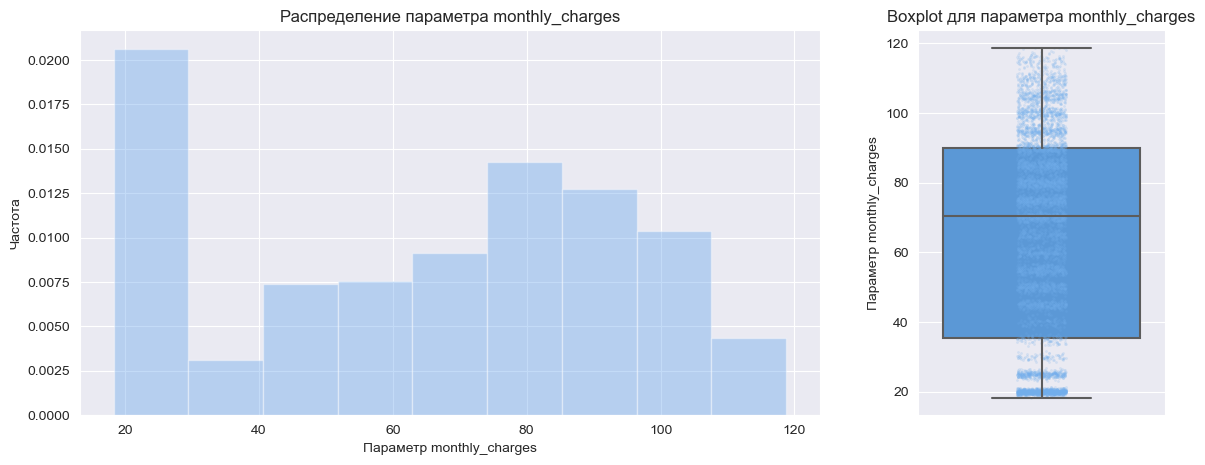

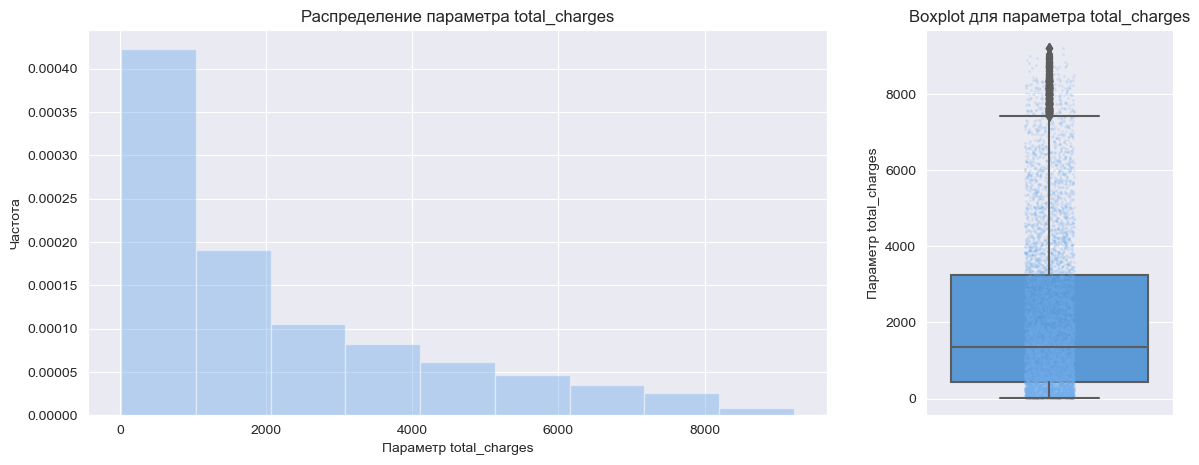

In [47]:
for feature in quantitative_features:
    hist_boxplot(merge_df, feature)

Изучим как распределены значения в признаках в разрере целевого признака `churn`.

In [48]:
# функция гистограммы плотности распределения в разрезе churn
def hist_section_churn(df, feature):
    """Функция для построения гистограммы плотности распределения
    в разрезе churn. На вход принимает датасет и признак, по которым
    формирует две выборки и строит по ним два графика в разрезе churn. 
    """
    df_churn_no = df[df['churn']=='No'][feature]    # распределение признака текущих абонентов
    df_churn_yes = df[df['churn']=='Yes'][feature]  # распределение признака ушедших абонентов

    # строим гистограммы плотности распределения значений призанков 
    fig, axes = plt.subplots(figsize=(17, 7))
    fig.suptitle(f'Плотность распределения признака {feature} в разрезе churn', size= 16)

    sns.distplot(df_churn_no, color='#6fa8dc', ax=axes, label='churn = No')
    sns.distplot(df_churn_yes, color='#e06666', ax=axes, label = 'churn = Yes')

    axes.legend()
    axes.set(ylabel='Значение')

    plt.show()

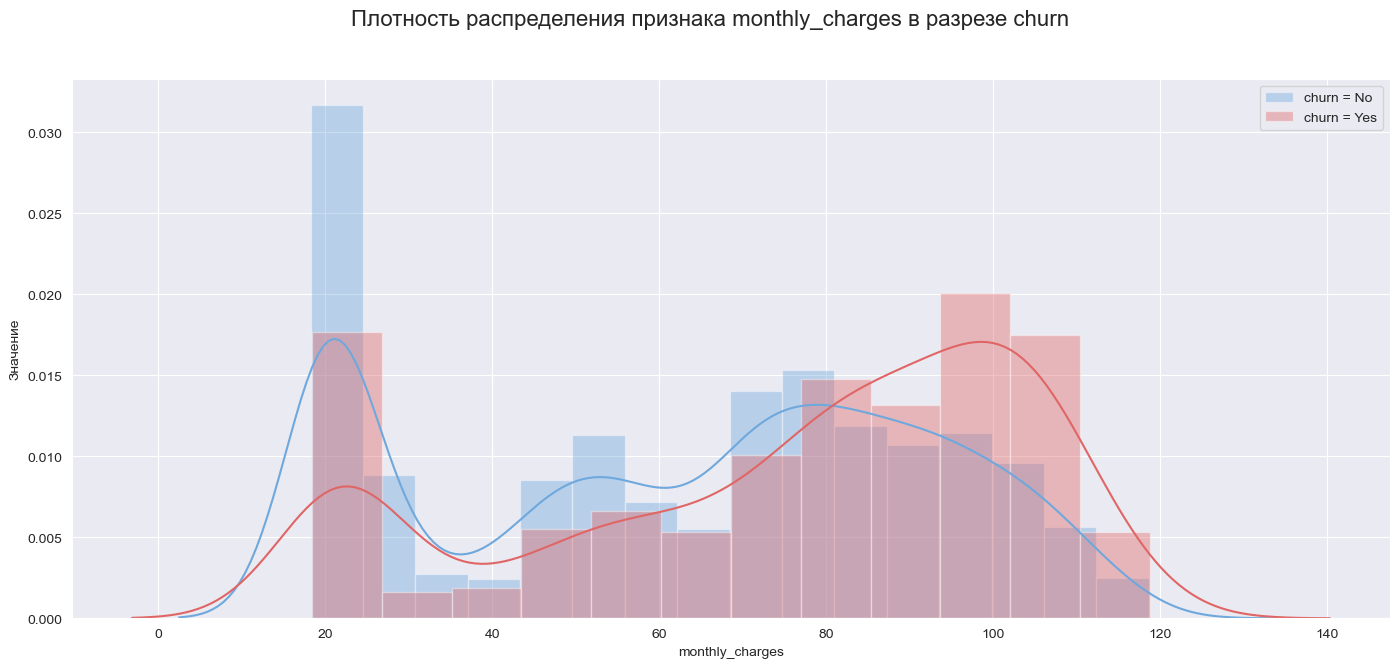

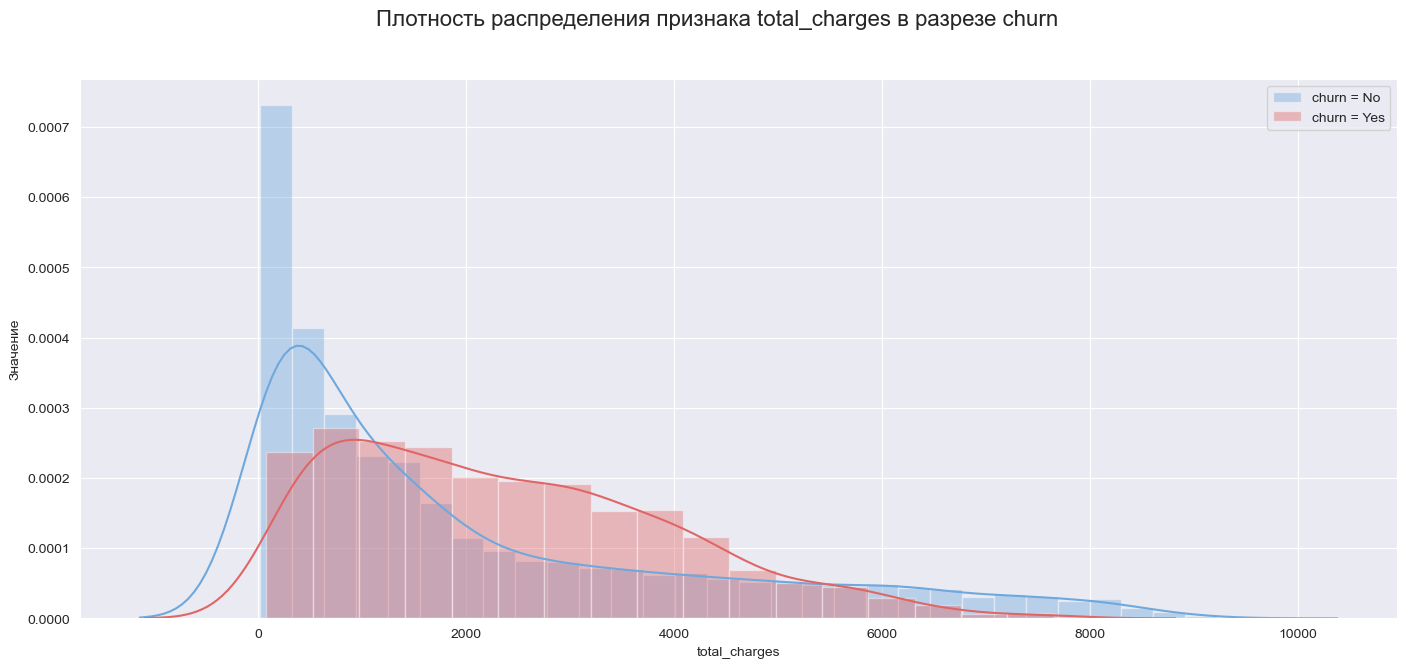

In [49]:
for feature in quantitative_features:
    hist_section_churn(merge_df, feature)

#### Категориальные признаки

In [50]:
# функция столбиковой диаграммы в разрезе churn
def countplot_section_churn(df, feature):
    """Функция для построения столбиковой диграммы. На вход
    принимает датасет и признак, по которым строит график 
    в разрезе целевого признака churn."""
    plt.figure(figsize = (15,5))
    plt.title(f'Распределение признака {feature} в разрезе churn', size=14)
    
    ax = sns.countplot(x=feature, hue='churn', data=df, palette='pastel')
    for label in ax.containers:
        ax.bar_label(label, size=12)
    plt.legend(loc='upper right', title='churn', fontsize=14) 
    plt.xlabel(' ', fontsize=12);
    plt.ylabel(' ', fontsize=12);
    plt.tick_params (axis='both', which='major', labelsize=14) 
    plt.show()

In [51]:
# формируем список категориальных признаков за исключнием идентификатора клиента и целевого признака
categorial_features_merge_df = merge_df.drop(['customer_id', 'churn'], axis=1).select_dtypes(include='object').columns.tolist()
# проверяем полученный список категориальных признаков
categorial_features_merge_df

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

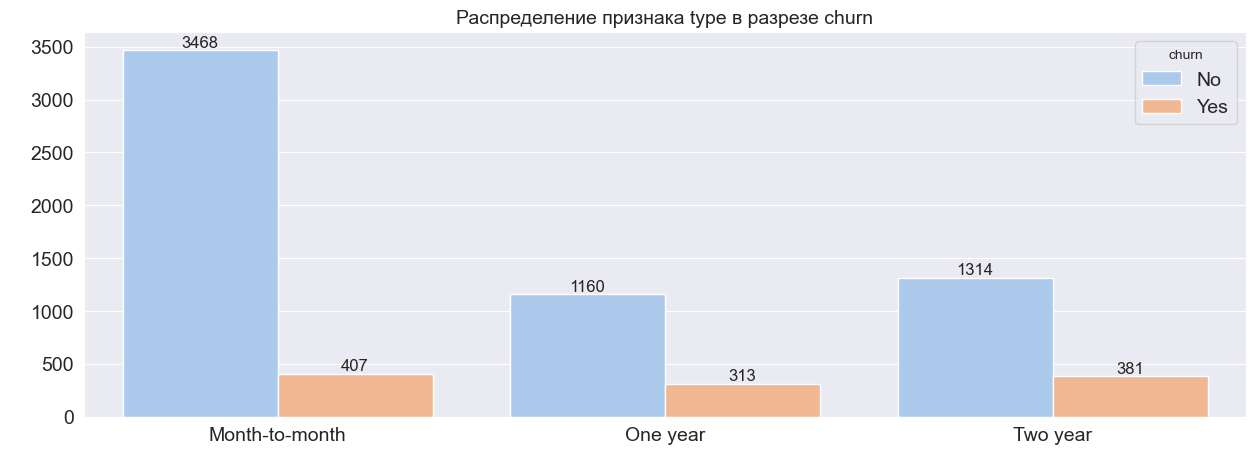

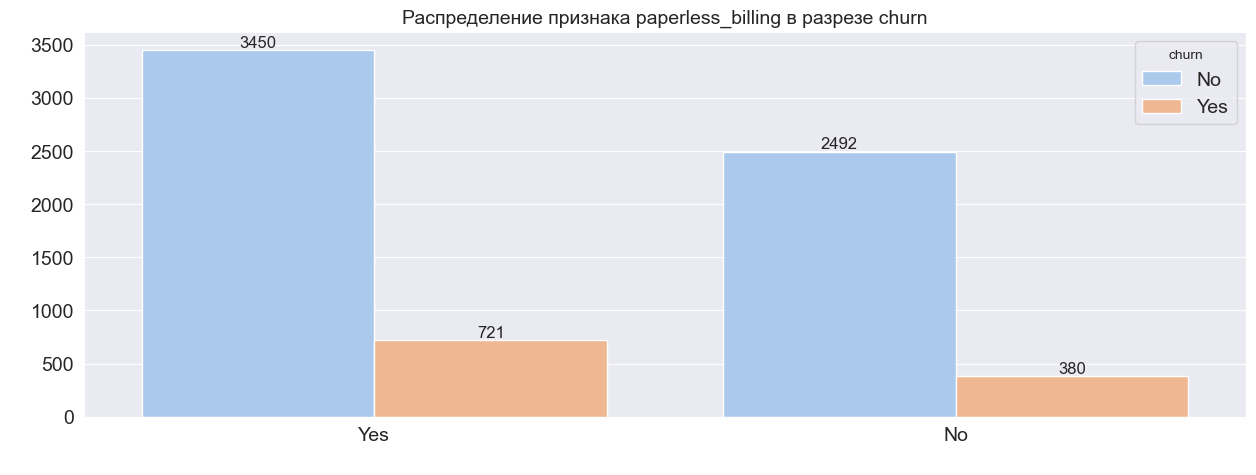

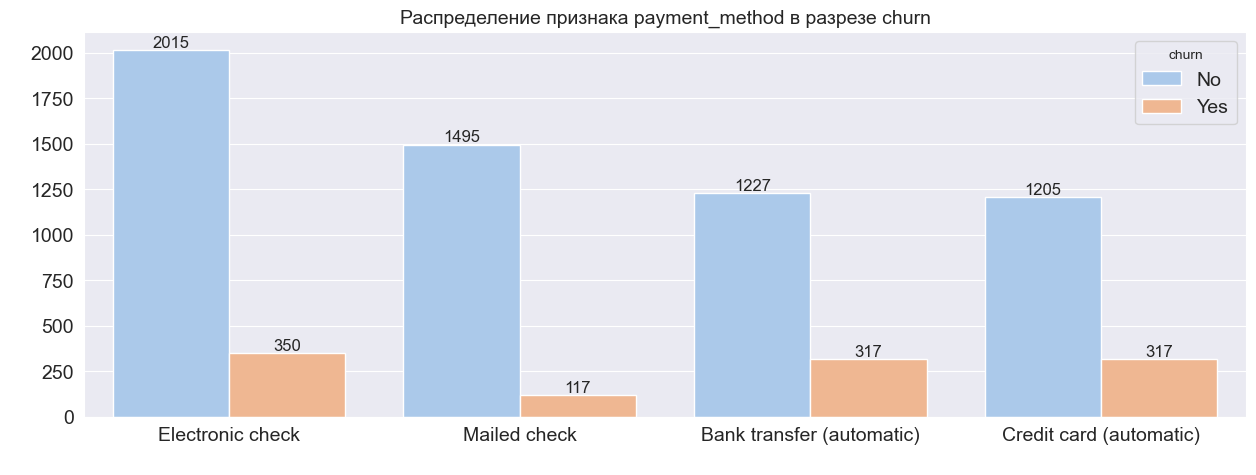

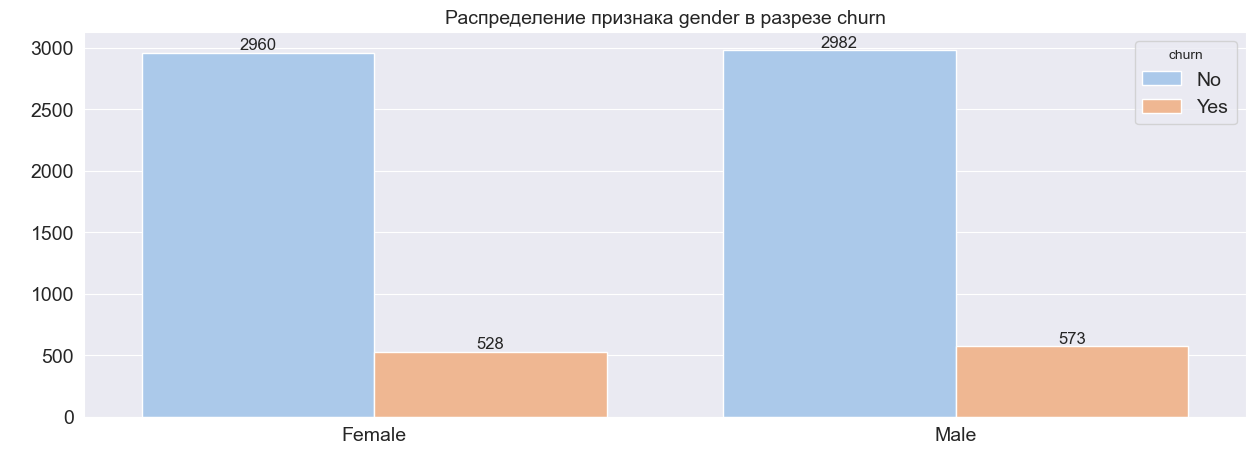

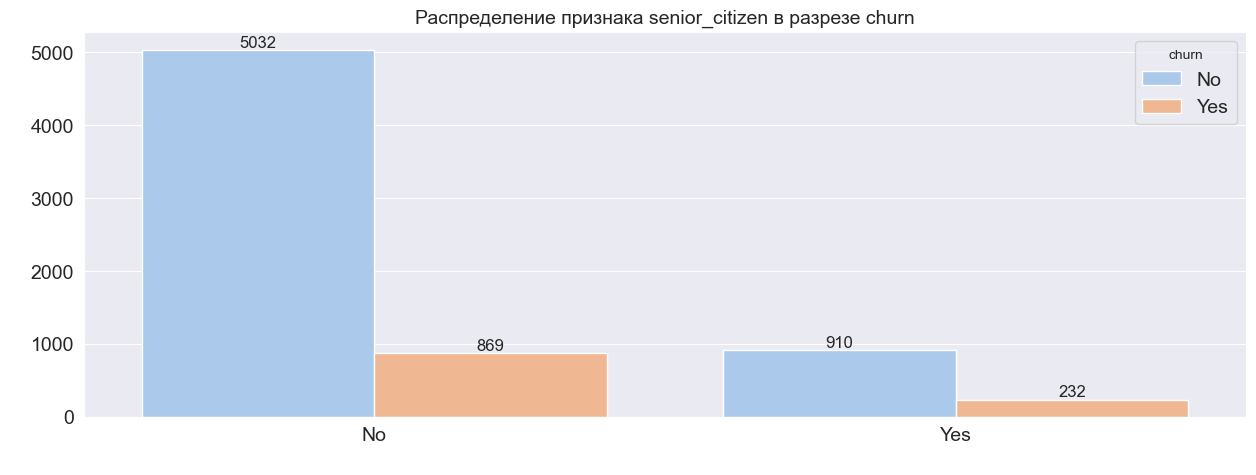

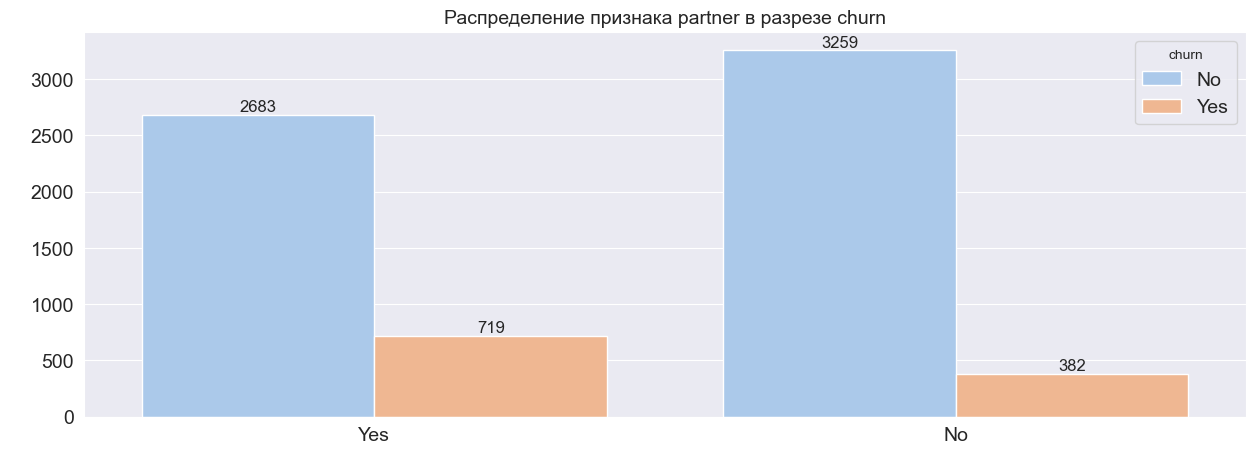

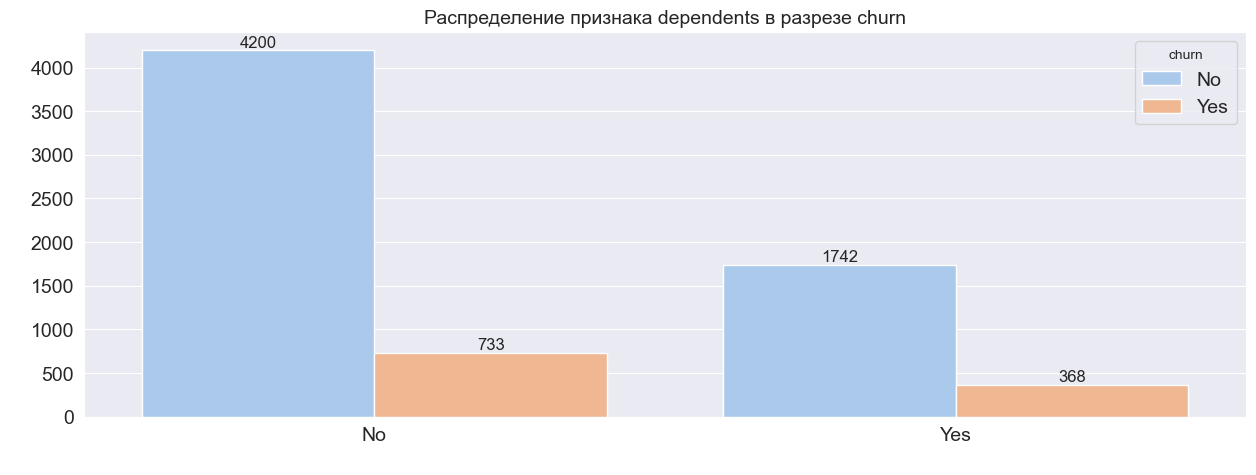

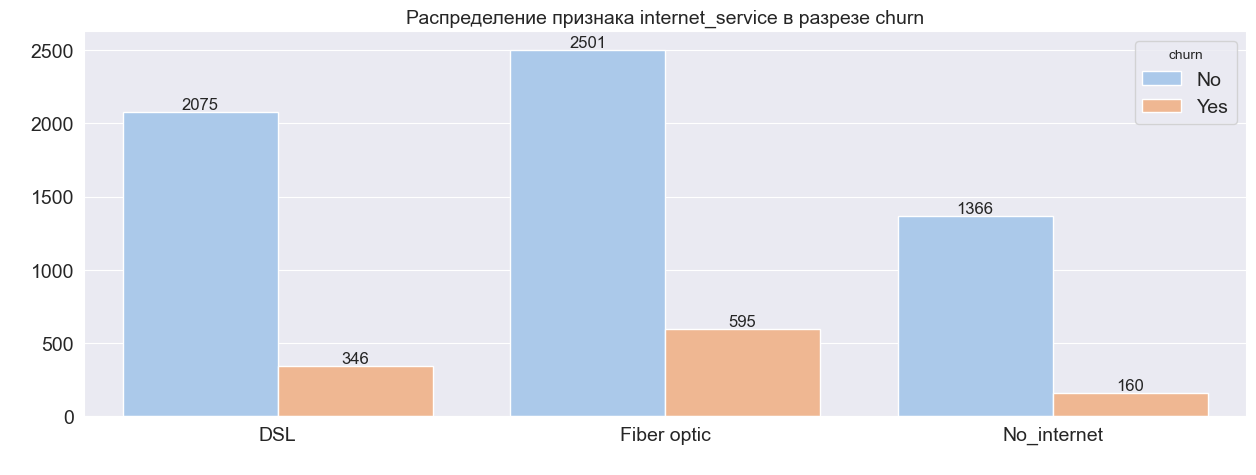

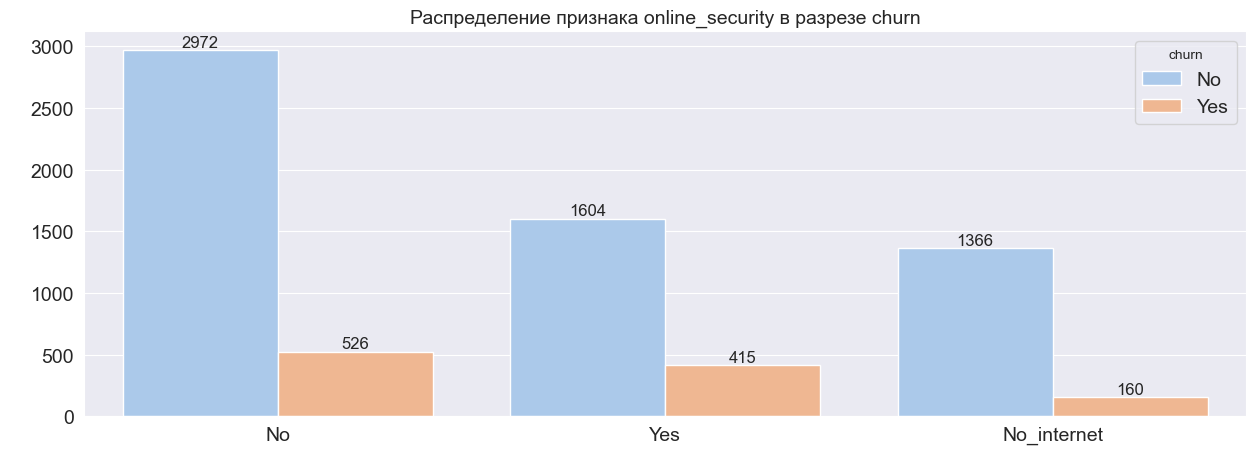

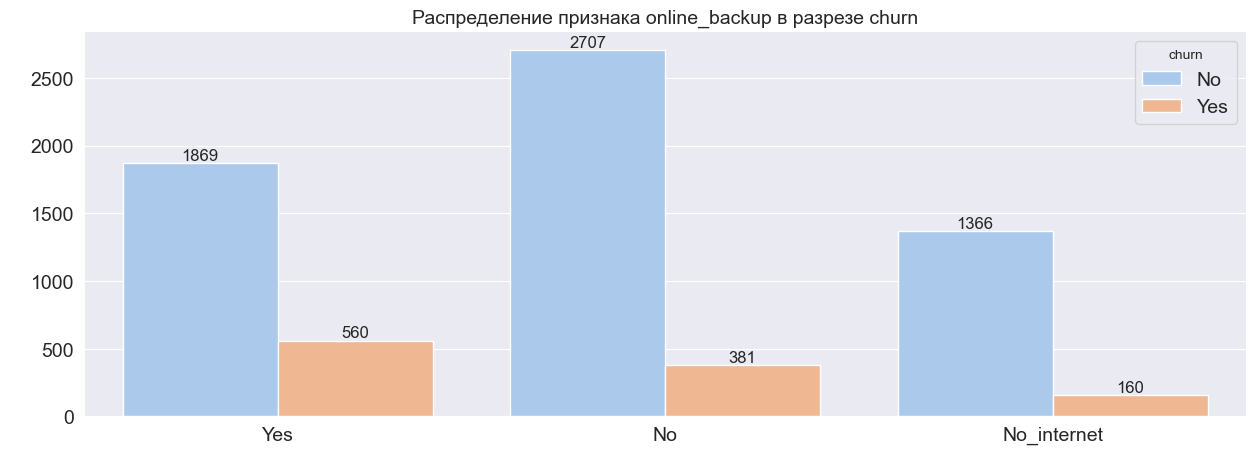

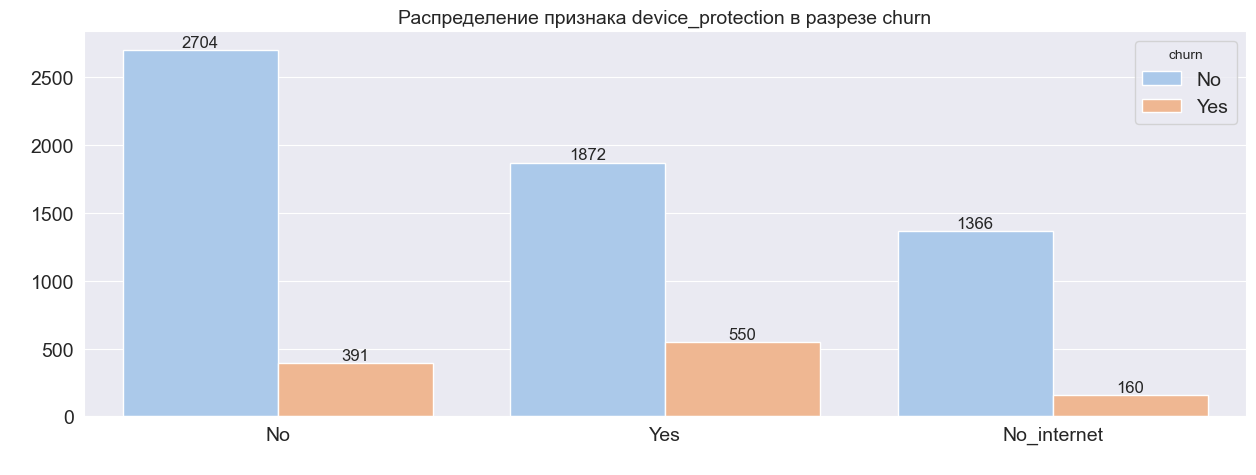

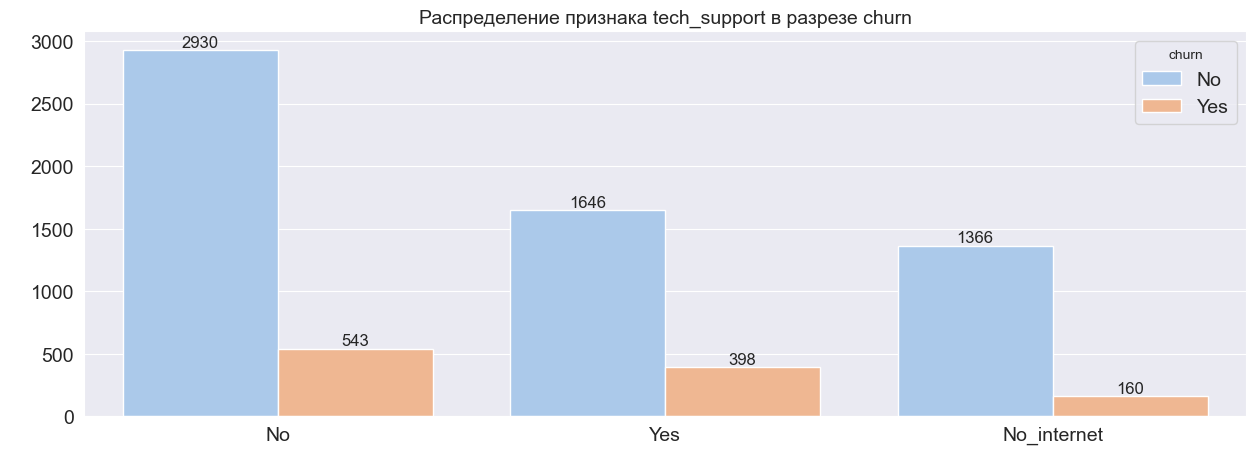

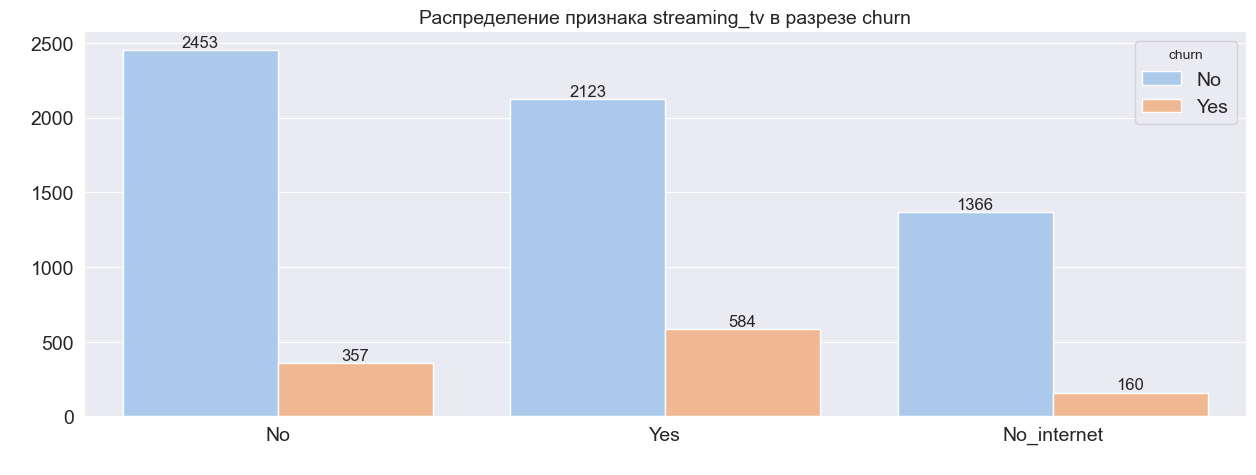

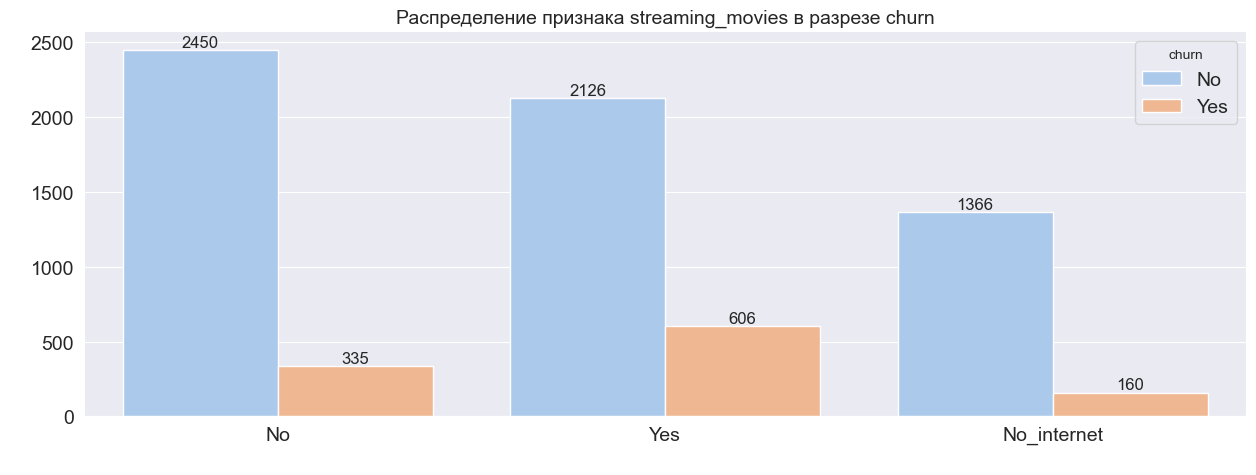

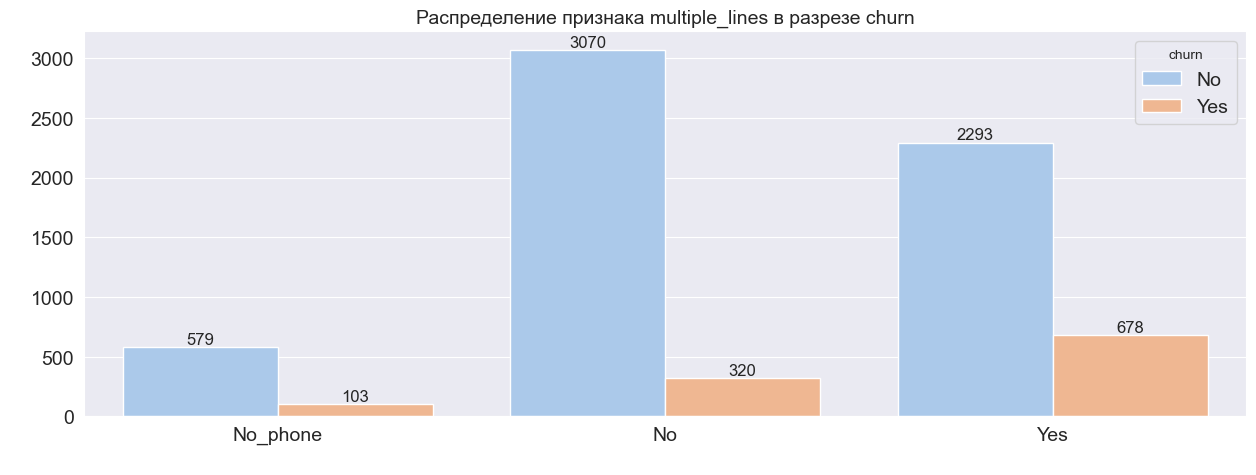

In [52]:
for feature in categorial_features_merge_df:
    countplot_section_churn(merge_df, feature)

* наименьшая доля оттока у абонентов, оплачивающих услуги оператора связи ежемесячно. Доля оттока у абонентов, оплачивающих услуги раз в год или раз в два года, примерно одинаковая;
* наличие электронного расчетного листа (признак `paperless_billing`) на долю оттока не влияет;
* в разрезе способа оплаты ((признак `payment_method`) наибольшая доля оттока у абонентов, оплачивающих услуги автоматической банковской транзакцией и автоматической оплатой кредитной картой;
* пол абонента на долю оттока не влияет;
* пенсионеры больше склонные оттоку;
* доля оттока среди женатых абонентов выше;
* доля оттока у абонентов с детьми (17%) незначительно выше. У абонентов без детей отток составляет 15%.









Проверим как взаимосвязан статус абонента и его семейное положение с потребляемыми услугами оператора связи.

#### Взаимосвязь статуса абонента и его семейным положением с потребляемыми услугами

В объединенном датасете есть информация о семи сервисах, используемых абонентами:
| признак (сервис)    | краткое описание   |
|----------|:----------|
| online_security    | блокировка опасных сайтов   |
| online_backup    | облачное хранилище файлов для резервного копирования данных   |
| device_protection    | антивирус   |
| tech_support    | выделенная линия технической поддержки   |
| streaming_tv    | стриминговое телевидение   |
| streaming_movies    | каталог фильмов   |
| multiple_lines    | подключение телефона к нескольким линиям одновременно   |

Создадим список этих сервисов и изучим взаимосвязи.

In [53]:
# создаем список предоставляемых оператором связи сервисов
list_service = ['online_security', 'online_backup', 'device_protection', 
                'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines',]

In [54]:
# функция для отрисовки графика количества подключенных услуг
def groupby_client_list_service(condition, feature, list_service, title):
    """Функция получает на вход условие для фильтрации данных, 
    список признаков для группировки, и название графика.
    По полученным параметрам группирует данные из merge_df
    и строит график распределения полученные значений.
    """
    df_client_list_service = merge_df.query(condition).groupby(feature)[list_service].apply(lambda x:(x=='Yes').sum()).reset_index()
    df_client_list_service.drop(feature, axis= 1 , inplace= True )

    # задаем значения для x и y
    x=list(df_client_list_service.iloc[0])
    y=list(df_client_list_service.columns.values)
    plt.figure(figsize=(10,4))
    ax = sns.barplot(x=x, y=y, estimator="sum", errorbar=None, palette='pastel')
    ax.bar_label(ax.containers[0], fontsize=12)
    ax.tick_params(labelsize=12)
    ax.set_title(title, size=16);

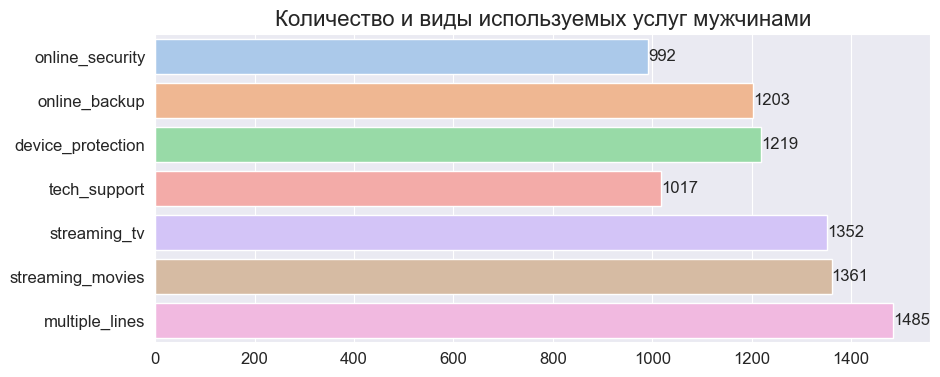

In [55]:
# формируем график используемых услуг мужчинами
groupby_client_list_service(condition='gender == "Male"', feature='gender', 
                            list_service=list_service, title='Количество и виды используемых услуг мужчинами')

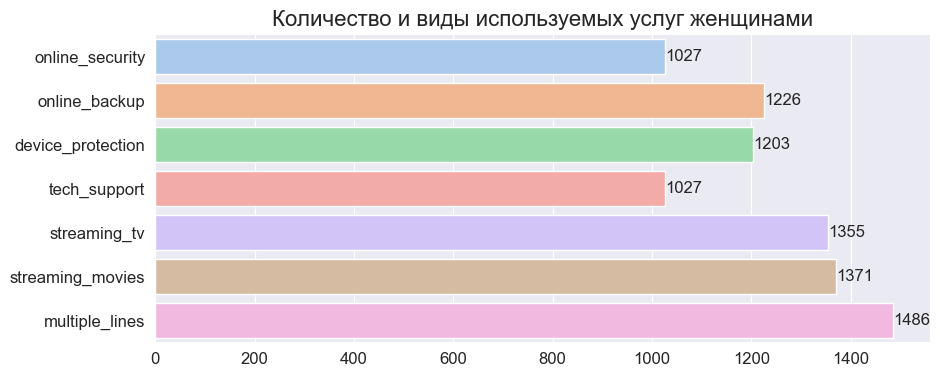

In [56]:
# формируем график используемых услуг женщинами
groupby_client_list_service(condition='gender == "Female"', feature='gender', 
                            list_service=list_service, title='Количество и виды используемых услуг женщинами')

Мужчины и женщины пользуются примерно одинаковым набором услуг. Небольшое отличие наблюдается в частоте использования облачного хранилища и антивируса - мужчины чаще используют антивирус, а женщины чаще облачное хранение.

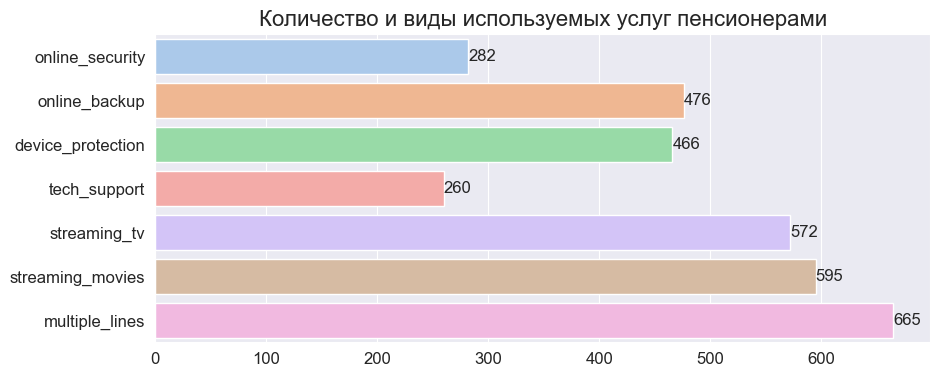

In [57]:
# формируем график используемых услуг пенсионерами
groupby_client_list_service(condition='senior_citizen == "Yes"', feature='senior_citizen', 
                            list_service=list_service, title='Количество и виды используемых услуг пенсионерами')

Пенсионеры заметно реже подключают услугу блокировки опасных сайтов и выделенную линию поддержки.

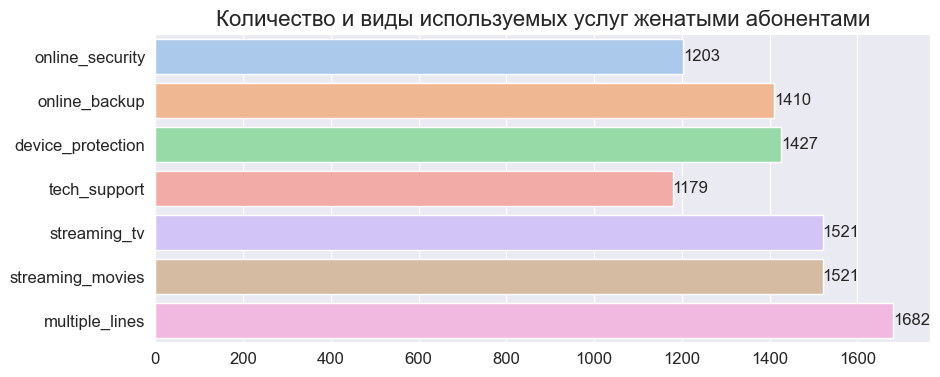

In [58]:
# формируем график используемых услуг женатыми абонентами
groupby_client_list_service(condition='partner == "Yes"', feature='partner', 
                            list_service=list_service, title='Количество и виды используемых услуг женатыми абонентами')

Популярность услуг среди женатых абонентов не сильно отличается от среднего количества услуг мужчин и женщин.

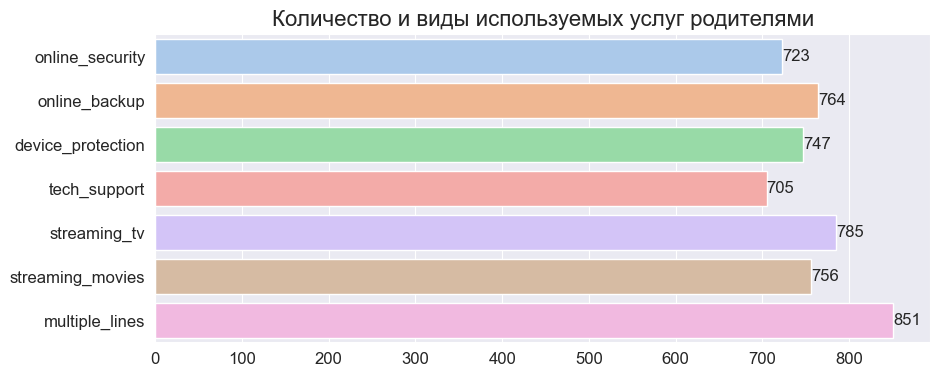

In [59]:
# формируем график используемых услуг родителями
groupby_client_list_service(condition='dependents == "Yes"', feature='dependents', 
                            list_service=list_service, title='Количество и виды используемых услуг родителями')

В этой группе абонентов наблюдается наибольшее отличие от популярности услуг рассмотренных ранее групп:
* наблюдается заметно выросшие число всех подключенных услуг кроме подключения телефона к нескольким линиям одновременно
* абоненты с детьми заметно чаще пользуются услугами блокировки опасных сайтов, выделенной линии технической поддержки, облачного хранения файлов, антивируса и каталога фильмов.

### Конструирование новых признаков

#### Признак duration_contract - продолжительность действия договора (в днях)

В наборе данных есть две даты - начала и окончания действия договора. Исходя из разности этих двух дат, мы можем получить новый признак `duration_contract`, который будет хранить число - общая продолжительность действия договора в днях.  
Проведем необходимые расчеты и запишем результаты в новый признак.

In [60]:
# формируем значения для нового признака 'duration_contract'
# вычисляем разницу между датами начала и окончания действия договора
# преобразовываем тип в int
merge_df['duration_contract'] = (merge_df['end_date'].dt.to_period('D').astype('int64') - 
                                 merge_df['begin_date'].dt.to_period('D').astype('int64'))

In [61]:
# проверим корректность добавления нового признака в общий датасет
merge_df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration_contract
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,No,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No_phone,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,No,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,No,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,No,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153


In [62]:
# проверяем корректность преобразования типа данных
print(f'Тип данных признака duration_contract после преобразования: {merge_df["duration_contract"].dtypes}')

Тип данных признака duration_contract после преобразования: int64


* новый признак `duration_contract` сформирован корректно
* в признаке хранится целочисленное значение, показывающее количество месяцев (продолжительность договора) на последнюю дату датасета
* тип записанной информации - *int*

Проверим как распределены значения в этом признаке в разрезе ушедших и действующих клиентов.

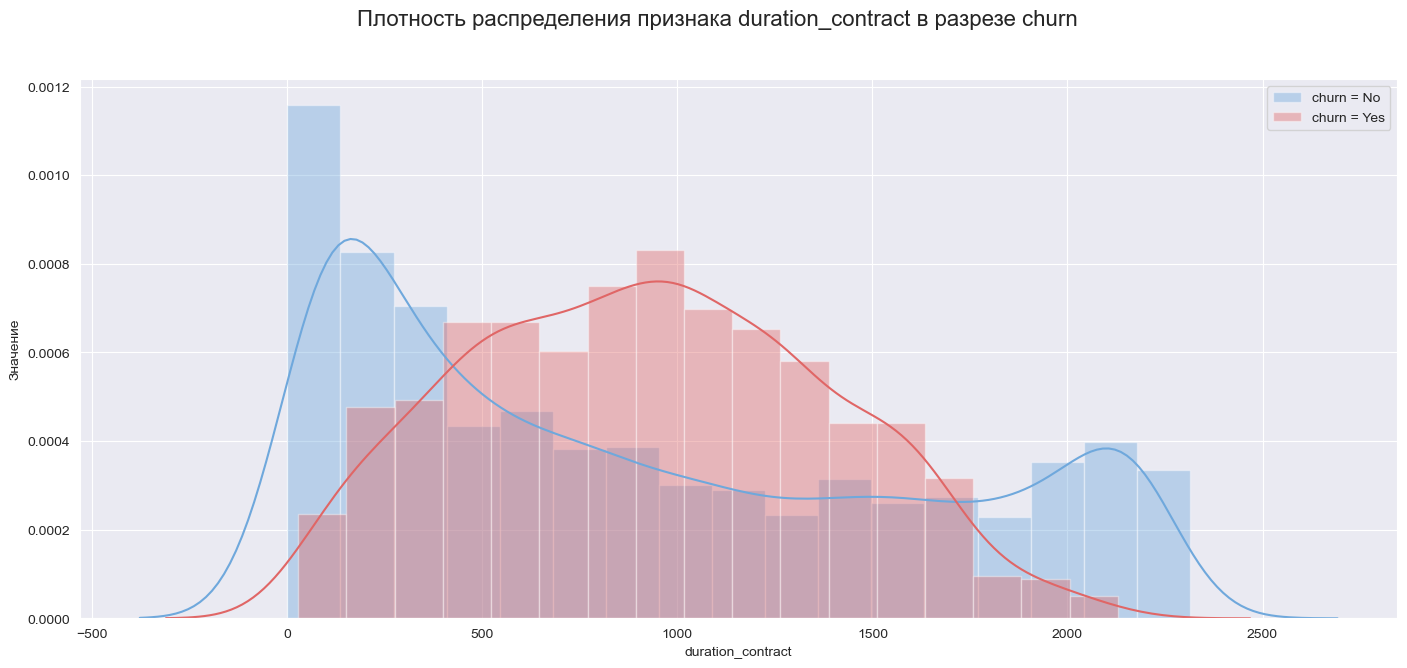

In [63]:
# строим гистрограмму плотности распределения признака 'duration_contract' (продолжительность договора)
# в разрезе целевого признака 'churn'
hist_section_churn(merge_df, 'duration_contract')

Исходя из полученной плотности распределения продолжительности договора в днях по имеющемуся набору данных чаще уходят клиенты, которые пробыли абонентами в диапазоне 350 - 1350 дней (1,3 - 3,8 лет). Соответственно, в данном диапазоне плотность действующих клиентов низкая. 

#### Признак count_services - количество используемых сервисов

В объединенном датасете есть информация о семи сервисах, используемых абонентами:
| признак (сервис)    | краткое описание   |
|----------|:----------|
| online_security    | блокировка опасных сайтов   |
| online_backup    | облачное хранилище файлов для резервного копирования данных   |
| device_protection    | антивирус   |
| tech_support    | выделенная линия технической поддержки   |
| streaming_tv    | стриминговое телевидение   |
| streaming_movies    | каталог фильмов   |
| multiple_lines    | подключение телефона к нескольким линиям одновременно   |

Создадим признак `count_services`, в который запишем общее количество сервисов, которыми пользуется абонент.

In [64]:
# создаем признак в датасете с нулевыми значениями
merge_df['count_services'] = 0

In [65]:
# в цикле проверяем условие наличия значения 'Yes' в искомых признаках
# если условие выполнено, то счетчик увеличивается на 1
# по завершению итерации по строке, значение счетчика записывается 
# в соответствующую строку признака count_services
for i in range(len(merge_df)):
    count = 0
    if merge_df.loc[i, "online_security"] == 'Yes':
        count += 1
    if merge_df.loc[i, "online_backup"] == 'Yes':
        count += 1
    if merge_df.loc[i, "device_protection"] == 'Yes':
        count += 1
    if merge_df.loc[i, "tech_support"] == 'Yes':
        count += 1
    if merge_df.loc[i, "streaming_tv"] == 'Yes':
        count += 1
    if merge_df.loc[i, "streaming_movies"] == 'Yes':
        count += 1
    if merge_df.loc[i, "multiple_lines"] == 'Yes':
        count += 1
        
    merge_df.loc[i, 'count_services'] = count

In [66]:
# проверяем результат на пяти случайных наблюдениях
merge_df.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration_contract,count_services
2362,7989-AWGEH,2016-01-01,2020-02-01,Month-to-month,Yes,Electronic check,39.20,2016.84,No,Male,No,Yes,Yes,DSL,Yes,No,No,No,No,Yes,No_phone,1492,2
3053,0960-HUWBM,2014-09-01,2020-02-01,Two year,Yes,Bank transfer (automatic),104.10,7443.15,No,Male,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,1979,5
5132,3850-OKINF,2014-03-01,2020-02-01,One year,Yes,Electronic check,66.20,4700.20,No,Male,No,Yes,Yes,DSL,Yes,No,No,No,Yes,No,Yes,2163,3
2437,0567-GGCAC,2019-07-01,2020-02-01,Month-to-month,No,Electronic check,61.40,429.80,No,Female,No,No,No,DSL,Yes,Yes,Yes,No,No,No,No,215,3
5466,0221-NAUXK,2019-04-01,2020-02-01,One year,Yes,Bank transfer (automatic),19.95,199.50,No,Male,No,No,Yes,No_internet,No_internet,No_internet,No_internet,No_internet,No_internet,No_internet,No,306,0


In [67]:
# группируем данные по количеству клиентов в разрезе количества подключенных услуг
count_client_services = merge_df.groupby('count_services', as_index=False)[['count_services']].count()
count_client_services.columns = ['count_client']
count_client_services['count_services'] = [0, 1, 2, 3, 4, 5, 6, 7]
# формируем новый столбец с долей клиентов от общего количества клиентов
count_client_services['fraction_lient'] = round((count_client_services['count_client']/merge_df.shape[0]), 2)
count_client_services

,count_client,count_services,fraction_lient
0,1667,0,0.24
1,1158,1,0.16
2,957,2,0.14
3,978,3,0.14
4,933,4,0.13
5,722,5,0.10
6,420,6,0.06
7,208,7,0.03


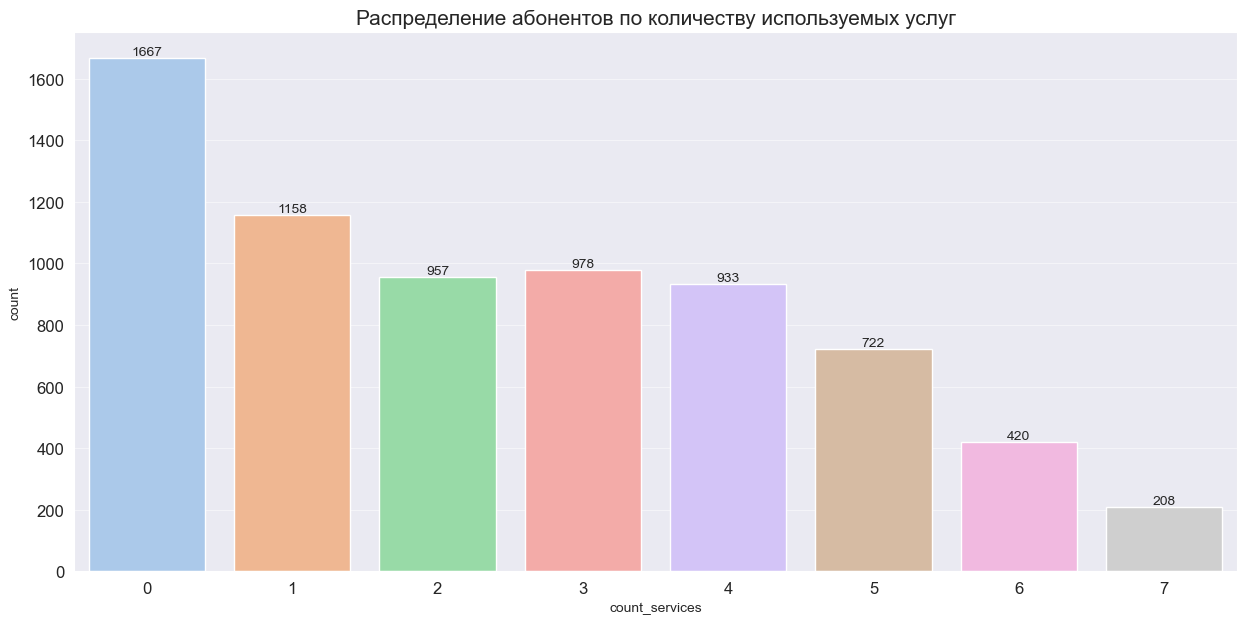

In [68]:
# строим столбчатую диаграмму общего распределения количества абонентов 
# в разрезе количества используемых услуг
plt.figure(figsize=(15,7))
ax = sns.countplot(data=merge_df,
                   x='count_services',
                   palette='pastel')
for label in ax.containers:
    ax.bar_label(label)

ax.tick_params(labelsize=12,
               grid_alpha=0.5)
sns.set(font_scale=1)
plt.title('Распределение абонентов по количеству используемых услуг', size=15);

Наблюдаем вполне предсказуемую закономерность - чем больше подключенных услуг, тем меньше таких клиентов.  
Доля абонентов, использующих от двух до четырех услуг распределена равномерно - примерно по 14% от общего количества исследуемых клиентов.

Посмотрим распределения количества клиентов по количеству используемых услуг в разрезе целевого признака `churn`.

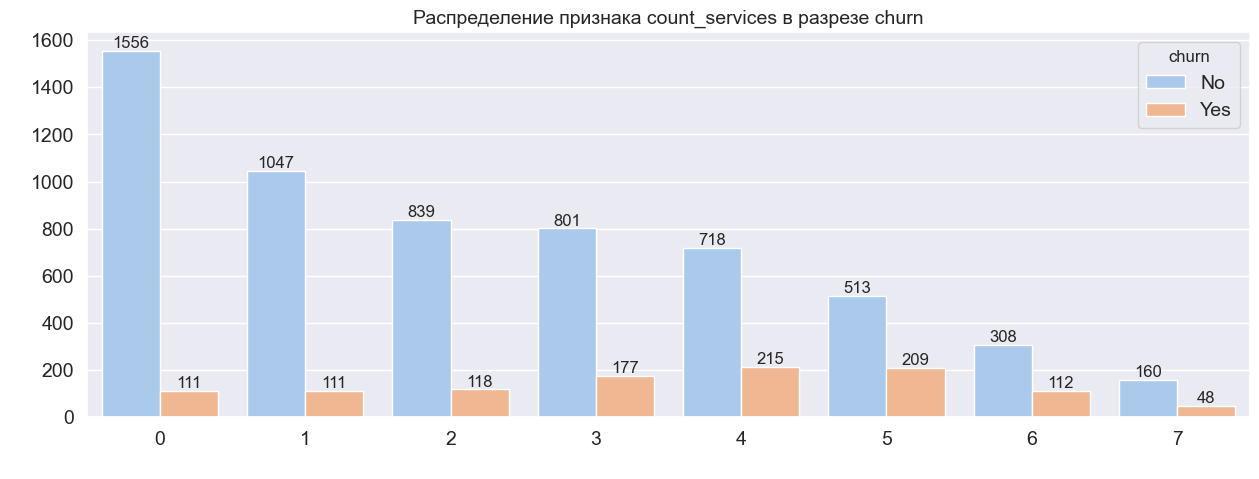

In [69]:
# строим столбчатую диаграмму распределения признака count_services в разрезе churn
countplot_section_churn(merge_df, 'count_services')

В количественном выражении число действующих абонентов уменьшается по мере увеличения числа подключенных у них услуг. И наоборот - по мере увеличения числа подключенных услуг у абонента, растет количество уходящих клиентов.  
Наибольшая доля оттока в разрезе количества подключенных услуг у абонентов с пятью такими услугами - примерно 50%.

### Корреляция признаков

На этом этапе, с учетом двух сконструированных признаков, в объединенном датасете имеется четыре количественных признаков:
* `monthly_charges` — расходы за месяц
* `total_charges` —  общие расходы абонента
* `duration_contract` — продолжительность действия договора
* `count_services` —  количество используемых сервисов

Проверим как эти признаки коррелируют между собой.

In [70]:
# формируем список количественных признаков
numerical_features_merge_df = merge_df.select_dtypes(include='number').columns.tolist()
print(f'Список количественных признаков:\n{numerical_features_merge_df}')

Список количественных признаков:
['monthly_charges', 'total_charges', 'duration_contract', 'count_services']


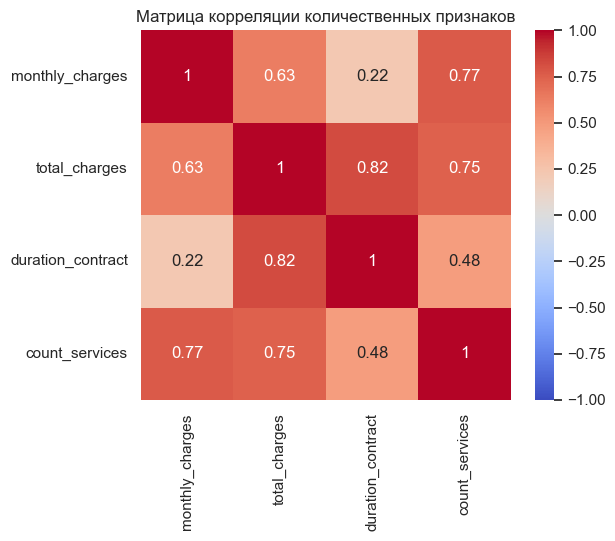

In [71]:
# строим матрицу коррелиции количественных признаков
plt.figure()
sns.heatmap(merge_df[numerical_features_merge_df].corr(), 
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)
plt.title('Матрица корреляции количественных признаков');

Все связи коэффициентов корреляции имеют положительную корреляцию.  
* **высокая корреляция** (по шкале Чеддока) наблюдается между следующими признаками:
  * общие расходы абонента и продолжительность действия договора **(сила связи 0,82)**
  * расходы за месяц и количество используемых сервисов **(0,77)**
  * общие расходы абонента и количество используемых сервисов **(0,77)**  
* **средняя корреляция:**
  * расходы за месяц и общие расходы абонента **(0,63)**
* **слабая корреляция:** 
  * продолжительность действия договора и количество используемых сервисов **(0,48)**
* **очень слабая корреляция:**
  * продолжительность действия договора и расходы за месяц **(0,22)**
  
В высокой корреляции наблюдается ожидаемая зависимость признаков - чем дольше абонент является клиентом, тем больше его общие расходы и чем больше количество используемых им сервисов, тем выше его ежемесячные и общие расходы.  
Ранее мы наблюдали распределение абонентов в разрезе количества используемых ими сервисов. В дополнение к этой информации можно отметить, что не все клиенты с течением времени начинают пользоваться большим количеством сервисов оператора связи.  
Еще меньше течение времени влияет на ежемесячные расходы абонента.

Рассмотрим взаимосвязи в общей картине - проверим корреляцию не только количественных, но и категориальных признаков.

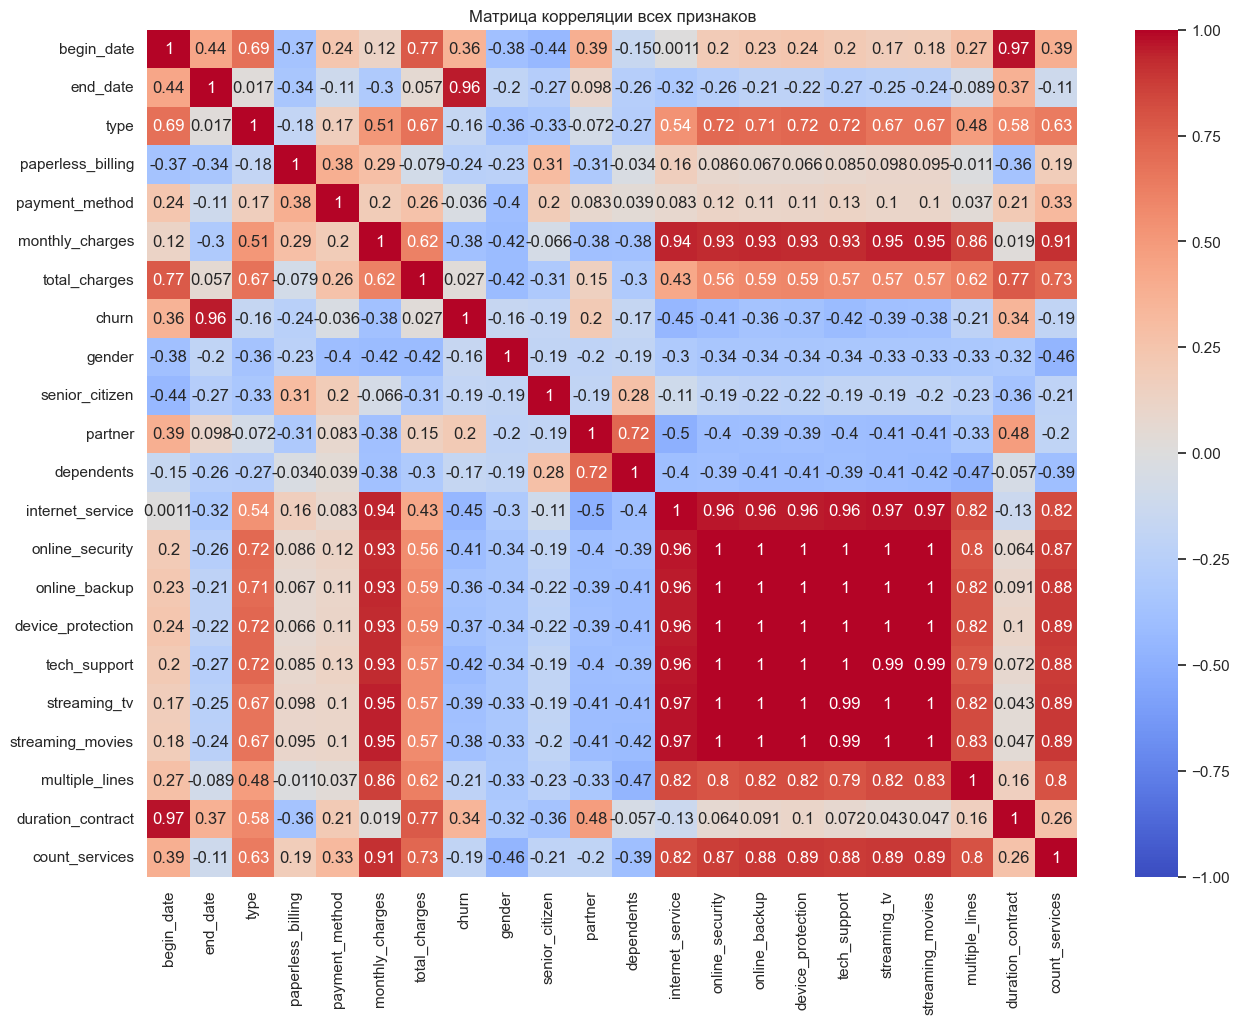

In [72]:
# строим матрицу корреляции для всех признаков
matrix = merge_df.drop('customer_id', axis= 1).phik_matrix(
    interval_cols=['monthly_charges', 'total_charges', 'duration_contract', 'count_services'])
plt.figure(figsize=(15,11))
sns.heatmap(matrix.corr(), 
            annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Матрица корреляции всех признаков');

**Корреляция с целевым признаком**
* **целевой признак `churn` имеет очень высокую корреляцию с датой  окончания действия договора (признак `end_date`), а признак `duration_contract` (продолжительность действия договора) имеет очень высокую корреляцию с датой начала действия договора (признак `begin_date`). Здесь есть риск утечки информации о целевом признаке.** На этапе подготовки данных для моделей машинного обучения удалим признаки c этими датами;
* целевой признак не взаимосвязан с общими расходами;
* целевой признак имеет слабую отрицательную корреляцию с признаками, обозначающими сервис (услугу);

**Корреляция между признаками**
* все признаки, обозначающими сервис (услугу), имеют очень высокую корреляцию с информацией о расходах за месяц и среднюю корреляцию с типом оплаты, а также с общими расходами абонента;
* высокая корреляция между признаками является ли абонент родителем и находится ли абонент в браке. При этом длительность действия договора не взаимосвязана с информацией о наличии детей, но имеет среднюю корреляцию с признаком, обозначающим, что абонент находится в браке;
* слабая отрицательная корреляция наблюдается между признаками, обозначающими сервис (услугу), и целевым признаком;
* между некоторыми признаками взаимосвязи нет:
  * расходы за месяц и продолжительность действия договора
  * семейным положением и типом оплаты
  * расходы за месяц не коррелируют с продолжительностью действия договора и с информацией является ли абонент пенсионером
  * продолжительность действия договора не имеет связи, либо она слабая с информацией по всем оказываемым услугам.

Посмотрим как распределены количественные признаки в разрезе целевого признака `churn`.

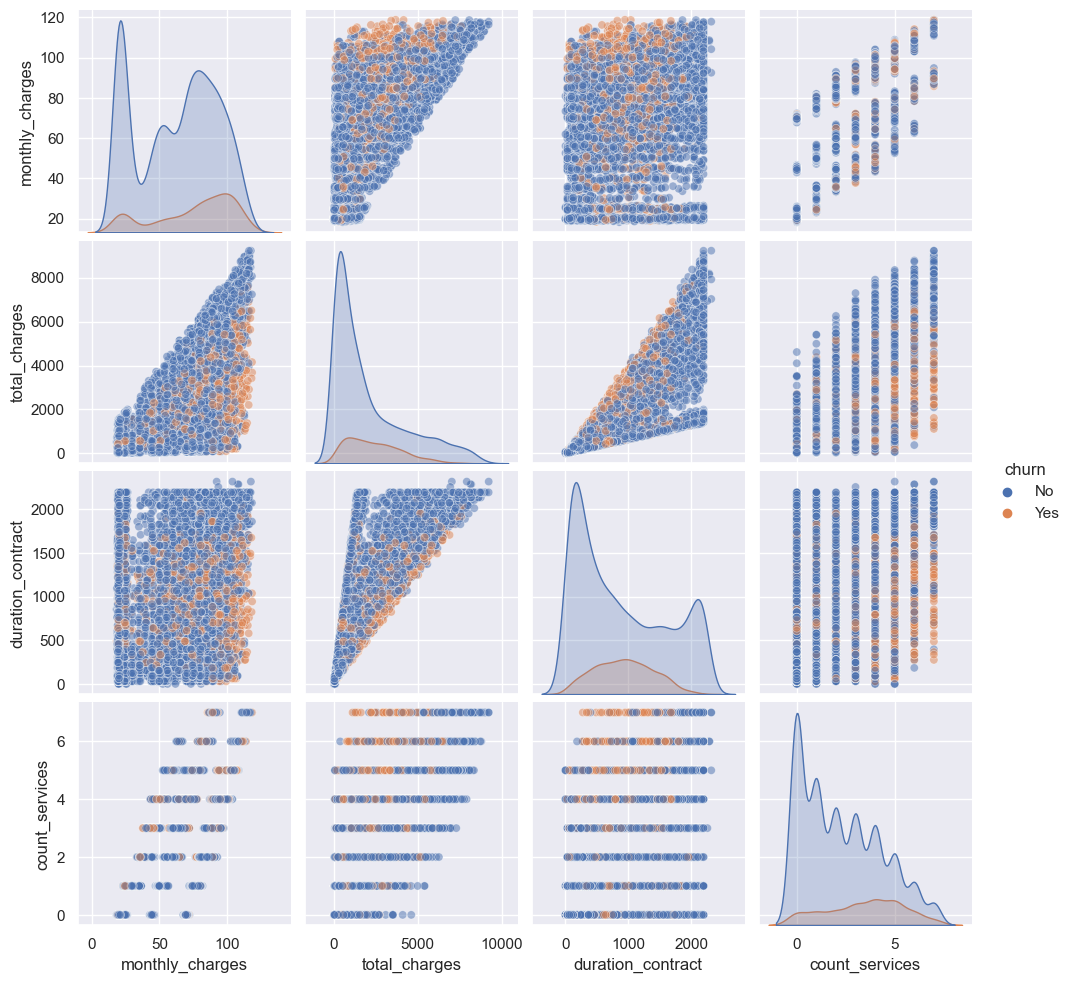

In [73]:
# строим диграмму рассеивания количественных признаков в разрезе целевого признака
sns.pairplot(merge_df, hue='churn', plot_kws={'alpha':0.5});

Ранее мы изучали плотность распределения действующих и уходящих абонентов в зависимости от продолжительности действия договора. Было отмечено, что уходящие клиенты, это те, кто преимущественно пользовался услугами 1,3- 3,8 лет.  
В дополнение к этой информации мы видим, что плотность таких уходящих клиентов приходится на тех, кто пользуется более пятью сервисами.  

Рассматривая абонентов в разрезе количества используемых ими сервисов видно, что **оттоку больше подвержены «платящие» клиенты**, которые используют большое количество сервисов оператора связи и на которых приходится большие показатели общих расходов.  
Клиенты, которые используют большинство сервисов, уходят в первые 2-4 года. 

**После 4 лет наблюдается «переломный момент» - когда существенно увеличивается лояльность абонентов и практически прекращается их отток**. Однако количество таких клиентов не велико.

Основная часть клиентов - это неплатящие, либо мало платящие абоненты - те, кто является абонентом до 1 года или не имеют подлюченных услуг.

## Подготовка данных

В датасете присутствует информация об идентификаторе клиента (признак `customer_id`) - для предсказания вероятности оттока клиентов эта информация не несет никакой пользы, удалим это признак.  
Кроме этого, в датасете присутствует информация о дате начала и окончания действия договора (признаки `begin_date` и `end_date`) - эти данные порождают высокий риск утечки целевого признака при обучении. Их тоже удалим.

In [74]:
# формируем список признаков, которые будем удалять из итогового датасета для обучения моделей
drop_features = ['customer_id', 'begin_date', 'end_date']

In [75]:
# создаем отдельный датасет для обучения моделей, из которого удалим лишние признаки
df_for_learning = merge_df.drop(columns=drop_features)

Сейчас значения целевого признака храняться в виде строк Yes и No.  
Для корректной работы моделей переведем эти значения в числа 1-*Yes* и 0-*No*.

In [76]:
# переводим значения целевого признака в цифровое обозначение
df_for_learning['churn'].replace({'Yes': 1, 'No': 0}, inplace = True)

# проверяем корректность преобразования целевого признака
df_for_learning['churn'].value_counts()

churn
0    5942
1    1101
Name: count, dtype: int64

### Анализ дисбаланса классов

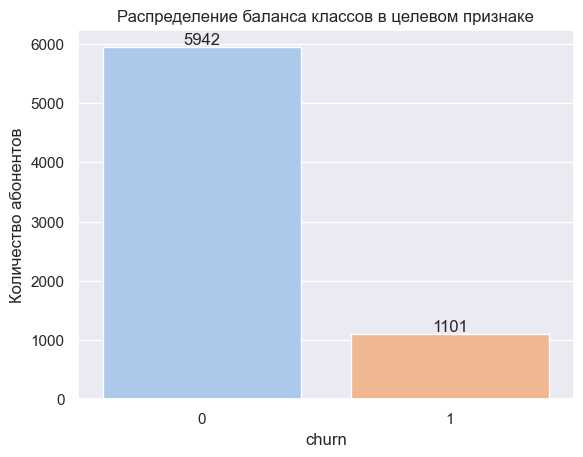

In [77]:
# строим диаграмму распределения классов в целевом признаке
ax = sns.countplot(data=df_for_learning,
                   x='churn',
                   palette='pastel')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title('Распределение баланса классов в целевом признаке')
plt.ylabel("Количество абонентов");

**Классы несбалансированны.** В имеющемся наборе данных доля негативных примеров с ушедшими клиентов слишком мала - всего 16%.

Дисбаланс классов обусловлен природой самих данных и такая пропорция классов представляется правдоподобной. Учитывая это, в данной работе **будем использовать модели машинного обучения на основе деревьев решений**, в том числе бустинговые, которые устойчивы к дисбалансу классов:
* *RandomForestClassifier* - бейзлайновая модель
* *Cat Boost*
* *LightGBM*
* *XGBoost*

**В качестве основной метрики качества используем *ROC AUC***, на которую также не влияет дисбаланс.

### Разделение данных на обучающую и тестовую выборки

In [78]:
# готовим признаки для обучающей выборки
features = df_for_learning.drop(columns='churn')
# выделеям целевой признак
target = df_for_learning.churn

# проверяем корректность признаков для обучения
features.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration_contract,count_services
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,No_phone,31,1
1,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036,2
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123,2
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,No_phone,1371,3
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153,0


In [79]:
# разделяем датасет на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.25,       # задаем размер тестовой выборки 25%
                                                    random_state=RANDOM_STATE)

# проверяем корректность разделение датасета на обучающую и тестовую выборки
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 5282
Размер тестовой выборки: 1761


### Пайплайн трансформации данных для Random Forest Classifier

В датасете содержатся количественные и категориальные признаки.  
Для корректной работы бустинговых моделей масштабирование количественных признаков не обязательно, а для категориальных у них есть свои встроенные кодировщики. 

Для бейзлайновой модели *RandomForestClassifier* мы планируем построить пайплайн подготовки данных.  
Количественные признаки будем приводить в единый масштаб с помощью *StandardScaler*, а категориальные признаки будем кодировать методом *OneHotEncoder*.

In [80]:
# формируем список категориальных признаков
categorial_features = features.select_dtypes(include='object').columns.tolist()
print(f'Список категориальных признаков:\n{categorial_features}')

Список категориальных признаков:
['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']


In [81]:
# формируем список количественных признаков
numerical_features = features.select_dtypes(include='number').columns.tolist()
print(f'Список количественных признаков:\n{numerical_features}')

Список количественных признаков:
['monthly_charges', 'total_charges', 'duration_contract', 'count_services']


In [82]:
# строим пайплайн трансформации данных для случайного леса
column_transformer_RFC = make_column_transformer(
    (   # масштабируем количественные признаки
        StandardScaler(), 
        numerical_features                   
    ),
    (   # кодируем категориальные признаки
        OneHotEncoder(drop='first'), 
        categorial_features
    ),
    remainder='passthrough',
    verbose_feature_names_out=False
)

# проверяем корректность пайплайна для случайного леса
column_transformer_RFC

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['monthly_charges', 'total_charges',
                                  'duration_contract', 'count_services']),
                                ('onehotencoder', OneHotEncoder(drop='first'),
                                 ['type', 'paperless_billing', 'payment_method',
                                  'gender', 'senior_citizen', 'partner',
                                  'dependents', 'internet_service',
                                  'online_security', 'online_backup',
                                  'device_protection', 'tech_support',
                                  'streaming_tv', 'streaming_movies',
                                  'multiple_lines'])],
                  verbose_feature_names_out=False)

In [83]:
# формируем датафрейм трансформированных данных обучающей выборки
X_train_transform_data_RFC = pd.DataFrame(data=column_transformer_RFC.fit_transform(X_train), 
                                 columns=column_transformer_RFC.get_feature_names_out())

print(f'В трансформированной обучающей выборке {X_train_transform_data_RFC.shape[1]} признаков')
# выводим первые пять строк
X_train_transform_data_RFC.head()

В трансформированной обучающей выборке 30 признаков


,monthly_charges,total_charges,duration_contract,count_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No_internet,online_security_No_internet,online_security_Yes,online_backup_No_internet,online_backup_Yes,device_protection_No_internet,device_protection_Yes,tech_support_No_internet,tech_support_Yes,streaming_tv_No_internet,streaming_tv_Yes,streaming_movies_No_internet,streaming_movies_Yes,multiple_lines_No_phone,multiple_lines_Yes
0,-1.31,-0.98,-1.23,-1.20,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.34,-0.75,-1.00,-0.71,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-1.48,-0.96,-1.14,-1.20,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
3,0.37,0.12,-0.02,-0.71,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.34,-0.74,-1.00,-0.71,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [84]:
# формируем датафрейм трансформированных данных тестовой выборки
X_test_transform_data_RFC = pd.DataFrame(data=column_transformer_RFC.transform(X_test), 
                                 columns=column_transformer_RFC.get_feature_names_out())

print(f'В трансформированной тестовой выборке {X_test_transform_data_RFC.shape[1]} признаков')
# выводим первые пять строк
X_test_transform_data_RFC.head()

В трансформированной тестовой выборке 30 признаков


,monthly_charges,total_charges,duration_contract,count_services,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No_internet,online_security_No_internet,online_security_Yes,online_backup_No_internet,online_backup_Yes,device_protection_No_internet,device_protection_Yes,tech_support_No_internet,tech_support_Yes,streaming_tv_No_internet,streaming_tv_Yes,streaming_movies_No_internet,streaming_movies_Yes,multiple_lines_No_phone,multiple_lines_Yes
0,-1.33,-0.95,-1.14,-1.20,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,-1.31,-0.48,0.51,-0.71,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
2,-1.51,-0.50,1.00,-1.20,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
3,0.38,-0.81,-1.09,-0.71,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.47,0.74,1.67,-0.71,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


Пайплайн трансформации данных обучающей и тестовой выборок отработал корректно - количественные признаки приведены к единому масштабу методом *StandardScaler*, а категориальные признаки закодированы методом *OneHotEncoder*.  
Кодирование данных методом *OneHotEncoder* увеличило количество признаков с 19 до 30.

### Подготовка категориальных признаков для LightGBM и XGBoost

Для корректной работы моделей *LightGBM* и *XGBoost* с категориальных признаков необходимо перевести их к типу данных *category*.

In [85]:
# создаем копию обучающей выборки
X_train_category_type = X_train.copy(deep=True)
X_train_category_type[categorial_features] = X_train_category_type[categorial_features].astype('category')

In [86]:
# проверяем корректность преобразования типов данных
X_train_category_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 6607 to 860
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               5282 non-null   category
 1   paperless_billing  5282 non-null   category
 2   payment_method     5282 non-null   category
 3   monthly_charges    5282 non-null   float64 
 4   total_charges      5282 non-null   float64 
 5   gender             5282 non-null   category
 6   senior_citizen     5282 non-null   category
 7   partner            5282 non-null   category
 8   dependents         5282 non-null   category
 9   internet_service   5282 non-null   category
 10  online_security    5282 non-null   category
 11  online_backup      5282 non-null   category
 12  device_protection  5282 non-null   category
 13  tech_support       5282 non-null   category
 14  streaming_tv       5282 non-null   category
 15  streaming_movies   5282 non-null   category
 16  multiple_

## Обучение моделей машинного обучения

Определим необходимые функции для обучения и визуализации результатов работы модели.

In [87]:
# функция для обучения Random Forest
def RFC_model_train(model, param_grid):
    """Функция пайплайна обучения модели RandomForestClassifier.
    На вход принимает модель и словарь с гиперпараметрами.
    Функция возвращает несколько параметров:
    обученную модель, матрицу ошибок предсказаний, список и важность признаков.
    """ 
    # собираем пайплайн построения модели
    model = model
    pipeline_model = make_pipeline(column_transformer_RFC, model)
    
    # устанавливаем 3 фолда для кросс-валидации с тестовой выборкой 20% на перемешанных данных
    cv=ShuffleSplit(n_splits=3, test_size=0.2, random_state=RANDOM_STATE)
    # подбираем наилучшие гиперпараметры
    gs_model = GridSearchCV(
        pipeline_model,         # получаем трансформированные данные и модель через пайплайн
        param_grid=param_grid,  # используем словарь с гиперпараметрами, полученный на вход функции
        scoring='roc_auc',      # устанавливаем метрику 'roc_auc' для поиска наилучших гиперпараметров
        n_jobs=-1,              # автоматически определяет количество доступных ядер и распределяет задачи между ними
        cv=cv                   # передаем настройки фолдов для кросс-валидации
    )
    start_train = time.time()
    gs_model.fit(X_train, y_train)
    end_train = time.time()
    time_train = end_train - start_train
    print(f'Время обучения: {time_train:.2f} cек')
    
    # лучшее значение roc_auc на кросс-валидации
    model_best_score = gs_model.best_score_
    print(f'Наилучший результат roc_auc на кросс-валидации: {round(model_best_score, 2)}')
    
    # лучшие гиперпараметры
    model_best_params = gs_model.best_params_
    print(f'Наилучшие гиперпараметры: {model_best_params}')
    
    # получаем обученную модель
    trained_model = list(gs_model.best_estimator_)[-1]
    # получаем список признаков
    features_name_model = pipeline_model[:-1].get_feature_names_out()
    # получаем важность признаков обученной модели
    feature_importances_model = trained_model.feature_importances_
    
    return model_best_score, trained_model, features_name_model, feature_importances_model, time_train

In [88]:
# функция для подбора гиперпараметров для бустинговых моделей
def grid_search(model, X_train, param):
    """Функция подбора лучших гиперпараметров с помощью RandomizedSearchCV.
    На вход принимает модель, словарь с гиперпараметрами, признаки и таргет.
    Возвращает словарь с лучшими гиперпараметрами.
    """
    # устанавливаем 3 фолда для кросс-валидации с тестовой выборкой 20% на перемешанных данных
    cv=ShuffleSplit(n_splits=4, test_size=0.2, random_state=RANDOM_STATE)
    
    # подбираем наилучшие гиперпараметры
    grid_model = RandomizedSearchCV(
        model,                        # передаем модель
        param,                        # передаем словарь с гиперпараметрами
        n_jobs=-1,                    # автоматически определяет количество доступных ядер и распределяет задачи между ними
        cv=cv,                        # передаем настройки фолдов для кросс-валидации
        scoring='roc_auc',            # устанавливаем метрику 'roc_auc' для поиска наилучших гиперпараметров
        random_state=RANDOM_STATE
    ) 
    
    start_train = time.time()             # засекаем время начала обучения
    grid_model.fit(X_train, y_train)      # обучаем модель
    end_train = time.time()               # замеряем время окончания обучения
    time_train = end_train - start_train  # считаем общее время обучения
    print(f'Время обучения: {time_train:.2f} cек')
    
    # лучшее значение roc_auc на кросс-валидации
    best_score = grid_model.best_score_
    print(f'Наилучший результат roc_auc на кросс-валидации: {round(best_score, 2)}')
    
    # лучшие гиперпараметры
    model_best_params = grid_model.best_params_
    print(f'Наилучшие гиперпараметры: {model_best_params}')
    
#     # получаем важность признаков обученной модели
#     feature_importances_model = grid_model.best_estimator_.feature_importances_
    
    return grid_model, best_score, model_best_params #, feature_importances_model

In [89]:
def boost_model_train(model, X_train, param):
    """Функция для обучения модели бустинговых моделей.
    На входе принимает модель, обучающую выборку и словарь с гиперпараметрами.
    Вызывает фнукцию grid_search_random для поиска лучших
    гиперпараметров. Возвращает наилучший результат roc-auc на кросс-валидации, 
    обученную модель и важность признаков.
    """
    # инициализируем полученую модель
    model = model
    # вызываем функцию для подбора гиперпараметров 
    trained_model, best_score, best_params = grid_search(model, X_train, param)
    
    # получаем важность признаков обученной модели
    feature_importances_model = trained_model.best_estimator_.feature_importances_
    
    return best_score, trained_model, feature_importances_model

In [90]:
# функция для визуализации важности признаков 
def show_coef(names, coef, positive=False):
    """Функция строит столбиковую диаграмму с важностью признаков,
    которая отсортирована по убыванию.
    На вход принимает названия признаков и коэффициенты их важности.
    """
    tmp_df = pd.Series(index=names, data=coef).sort_values(ascending=False)
    plt.figure(figsize=(15,10))
    if positive:
        sns.barplot(x=abs(tmp_df.values), y=tmp_df.index)
    else:
        sns.barplot(x=tmp_df.values, y=tmp_df.index)
    plt.tight_layout
    plt.show()

In [91]:
# функция для построения графика ROC-кривой
def plot_roc_curve(fper, tper):
    """Функция строит график с ROC-кривой."""
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

In [92]:
# функция построения тепловой карты для матрицы ошибок
def plot_confusion_matrix(confusion_matrix, title='Confusion Matrix'):
    """Функция принимает на вход матрицу ошибок предсказаний модели
    и строит тепловую карту по ней с указанием названия и количества ошибок, 
    процентного соотношения.
    """
    plt.figure(figsize = (5,4))

    # устанавливаем имена и формат значений, которые будут отображаться в полях
    classes = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    values = ['{0:0.0f}'.format(x) for x in confusion_matrix.flatten()]
    percentages = ['{0:.1%}'.format(x) for x in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    # объединяем classes, values и percentages в одну запись
    combined = [f'{i}\n{j}\n{k}' for i, j, k in zip(classes, values, percentages)]
    combined = np.asarray(combined).reshape(2,2)

    # создаем и настраиваем подписи к графику
    matrix = sns.heatmap(confusion_matrix, annot=combined, fmt="", cmap='YlGnBu')
    matrix.set(title=f'{title}')

    plt.show()

Все необходимые функции определены, перейдем к обучению моделей.

### Модель Random Forest (baseline)

In [93]:
# создаем объект класса модели Random Forest
model_RFC = RandomForestClassifier(random_state=RANDOM_STATE)

# формируем словарь с гиперпараметрами для модели Random Forest
param_grid_model_RFC = {
    'randomforestclassifier__n_estimators': range(100, 501, 100), # число деревьев в случайном лесу
    'randomforestclassifier__max_depth': range(2, 11)             # максимальная глубина деревьев
#     'randomforestclassifier__min_samples_split': range(2, 21), # минимальное число объектов, необходимое для того, 
#                                                                    # чтобы узел дерева мог бы расщепиться
#     'randomforestclassifier__min_samples_leaf': range(1, 21),  # минимальное число объектов в листьях
    }
# полученный результат работы функции RFC_model_train с подбором данных гиперпараметров
# Время обучения: 2923.13 cек
# Наилучший результат roc_auc на кросс-валидации: 0.83
# Наилучшие гиперпараметры: {'randomforestclassifier__bootstrap': True, 
#                            'randomforestclassifier__max_depth': 8, 
#                            'randomforestclassifier__min_samples_leaf': 1, 
#                            'randomforestclassifier__min_samples_split': 11, 
#                            'randomforestclassifier__n_estimators': 500}
# CPU times: total: 57.9 s
# Wall time: 48min 43s

# для экономии времени повторных вычислений словарь для поиска лучших гиперпараметров закомментирован
# ниже добавлен словарь с уже подобранными лучшими гиперпараметрами

# формируем словарь с уже подобранными гиперпараметрами для модели Random Forest
# param_grid_model_RFC = {
#     'randomforestclassifier__n_estimators': [500],     # число деревьев в случайном лесу
#     'randomforestclassifier__max_depth': [8],          # максимальная глубина деревьев
#     'randomforestclassifier__min_samples_split': [11], # минимальное число объектов, необходимое для того, 
#                                                        # чтобы узел дерева мог бы расщепиться
#     'randomforestclassifier__min_samples_leaf': [1],   # минимальное число объектов в листьях
#     'randomforestclassifier__bootstrap': [True],       # использование для построения деревьев подвыборки с возвращением
#     }

In [94]:
%%time
# обучаем модель Random Forest
model_best_score_model_RFC, trained_model_RFC, features_name_RFC, \
feature_importances_RFC, time_train_RFC = RFC_model_train(model_RFC, param_grid_model_RFC)

Время обучения: 213.87 cек
Наилучший результат roc_auc на кросс-валидации: 0.83
Наилучшие гиперпараметры: {'randomforestclassifier__max_depth': 9, 'randomforestclassifier__n_estimators': 400}
CPU times: total: 6.02 s
Wall time: 3min 33s


**Метрика *ROC-AUC* бейзлайновой модели составляет 0.83**  
Сравним этот результат с бустинговыми моделями (*Cat Boost* и *Light GBM*)

### Модель Cat Boost

In [95]:
# инициализируем модель Cat Boost
model_cat_boost = CatBoostClassifier(
    eval_metric='AUC',
    verbose=False,
    random_state=RANDOM_STATE,
    cat_features=categorial_features   # передаем список категориальных признаков
)

# формируем словарь для подбора гиперпараметров модели Cat Boost
param_grid_cat_boost = {
    'iterations': range(50, 1001, 50),          # число деревьев в случайном лесу
    'depth': range(2, 11),                      # максимальная глубина деревьев
    'learning_rate': np.arange(0, 1.1, 0.1),    # скорость обучения 
    'l2_leaf_reg': range(0, 11)                 # коэффициент регуляризации L2
}

In [96]:
%%time
# обучаем модель Cat Boost
best_score_cat_boos, trained_model_cat_boos, \
feature_importances_model_cat_boos = boost_model_train(model_cat_boost, X_train, param_grid_cat_boost)

Время обучения: 674.09 cек
Наилучший результат roc_auc на кросс-валидации: 0.92
Наилучшие гиперпараметры: {'learning_rate': 0.4, 'l2_leaf_reg': 6, 'iterations': 850, 'depth': 3}
CPU times: total: 20.6 s
Wall time: 11min 14s


**Метрика *ROC-AUC* у Cat Boost значительно выше бейзлайновой модели - на кросс-валидации она составила 0.91**

### Модель LightGBM

In [97]:
# инициализируем модель LightGBM
model_LGBM = LGBMClassifier(
    eval_metric='AUC',
    random_state=RANDOM_STATE,
    verbose = -1
)

# формируем словарь для подбора гиперпараметров модели LightGBM
param_grid_LGBM = {
    'n_estimators': range(50, 1001, 50),       # число деревьев в случайном лесу
    'max_depth': range(2, 11),                 # максимальная глубина, разрешенная для деревьев в ансамбле
    'learning_rate': np.arange(0, 1.1, 0.1),   # скорость обучения
    'reg_lambda': range(0, 11),                # коэффициент регуляризации L2
    'num_threads': [1]                         # количество потоков, используемых для обучения
}

In [98]:
%%time
# обучаем модель LightGBM
best_score_LGBM, trained_model_LGBM, \
feature_importances_model_LGBM = boost_model_train(model_LGBM, X_train_category_type, param_grid_LGBM)

Время обучения: 10.64 cек
Наилучший результат roc_auc на кросс-валидации: 0.9
Наилучшие гиперпараметры: {'reg_lambda': 7, 'num_threads': 1, 'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.6000000000000001}
CPU times: total: 625 ms
Wall time: 10.6 s


**У Light GBM наилучший результат метрики *ROC-AUC* на кросс-валидации: 0.9**

### Модель XGBoost

In [99]:
# инициализируем модель XGBoost
model_XGBoost = XGBClassifier(
    # eval_metric='AUC',
    random_state=RANDOM_STATE,
    verbose = -1,
    enable_categorical=True
)

# формируем словарь для подбора гиперпараметров модели XGBoost
param_grid_XGBoost = {
    'n_estimators': range(50, 1001, 50),       # число деревьев в случайном лесу
    'max_depth': range(2, 11),                 # максимальная глубина, разрешенная для деревьев в ансамбле
    'learning_rate': np.arange(0, 1.1, 0.1),   # скорость обучения
    'l2_leaf_reg': range(0, 11)                # коэффициент регуляризации L2
}

In [100]:
%%time
# обучаем модель XGBoost
best_score_XGBoost, trained_model_XGBoost, \
feature_importances_model_XGBoost = boost_model_train(model_XGBoost, X_train_category_type, param_grid_XGBoost)

Время обучения: 12.92 cек
Наилучший результат roc_auc на кросс-валидации: 0.91
Наилучшие гиперпараметры: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.30000000000000004, 'l2_leaf_reg': 7}
CPU times: total: 641 ms
Wall time: 12.9 s


## Выбор лучшей модели

In [101]:
# формируем сравнительную таблицу
comparison_table = pd.DataFrame(
    {'Random Forest' : [model_best_score_model_RFC],
     'Cat Boost' : [best_score_cat_boos],
     'Light GBM' : [best_score_LGBM],
     'XGBoost' : [best_score_XGBoost]
    },
    index=['ROC-AUC']).T

# округлим полученные значения
# comparison_table = np.round(comparison_table, decimals = 2) 
comparison_table

,ROC-AUC
Random Forest,0.83
Cat Boost,0.92
Light GBM,0.90
XGBoost,0.91


Наилучший результат метрики *ROC-AUC* показала модель Cat Boost.  
Изучим ее поведение на тестовой выборке.

In [102]:
# функция для вывода метрик
def print_all_metrics(y_test, prediction_proba, prediction):
    """Функция на вход принимает правильные ответы и полученные предсказания.
    Считает и выводи на экран метрики качества классификации.
    """
    count_symbol = 16 # количество символов от левого края для выравнивания колонки со значениями
    print('roc_auc_score: '.ljust(count_symbol), round(roc_auc_score(y_test, prediction_proba), 2))
    print('accuracy_score: '.ljust(count_symbol), round(accuracy_score(y_test, prediction), 2))
    print('recall: '.ljust(count_symbol), round(recall_score(y_test, prediction), 2))
    print('precision: '.ljust(count_symbol), round(precision_score(y_test, prediction), 2))
    print('F1-мера: '.ljust(count_symbol), round(f1_score(y_test, prediction), 2))

In [103]:
# получаем предсказания на тестовой выборке
prediction_proba = trained_model_cat_boos.predict_proba(X_test)[:,1]
prediction = trained_model_cat_boos.predict(X_test)
confusion_matrix_cat_boost = confusion_matrix(y_test, prediction)

In [104]:
# расчитываем метрики качества классификации
print('\033[1mМетрики качества работы модели Cat Boost на тестовой выборке:\033[0m')
print_all_metrics(y_test, prediction_proba, prediction)

Метрики качества работы модели Cat Boost на тестовой выборке:
roc_auc_score:   0.94
accuracy_score:  0.94
recall:          0.65
precision:       0.9
F1-мера:         0.76


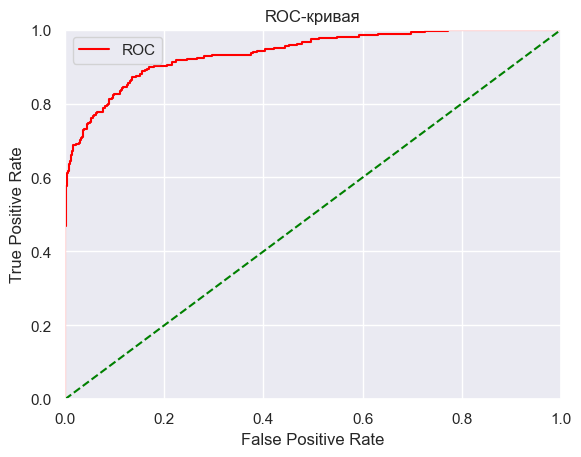

In [105]:
# отрисовываем ROC-кривую
fper, tper, thresholds = roc_curve(y_test, prediction_proba)
plot_roc_curve(fper, tper)

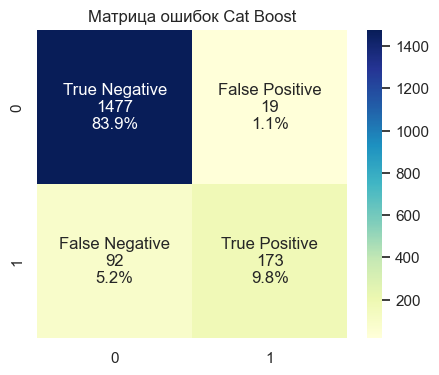

In [106]:
# строим матрицу ошибок предсказаний модели Cat Boost
plot_confusion_matrix(confusion_matrix_cat_boost, title='Матрица ошибок Cat Boost')

Из 1761 предсказаний на тестовой выборке:
  * Модель верно классифицировала 1619 (92% от общего количества предсказаний) абонентов:
    * 1477 (83,9%) абонентов, которые не уходят
    * 173 (9,8%) абонента, которые перестают пользоваться услугами оператора связи.  
  * Модель ошиблась 142 раза (8% от всех предсказаний):
    * 13 (0,7%) ложно-положительных предсказаний - то есть 13 абонентов неверно были отнесены к действующим клиентам, хотя на самом деле они уходящие
    * 129 (7,3%) ложно-отрицательных предсказаний - то есть 129 лояльных клиентов были ошибочно классифицированы как уходящие

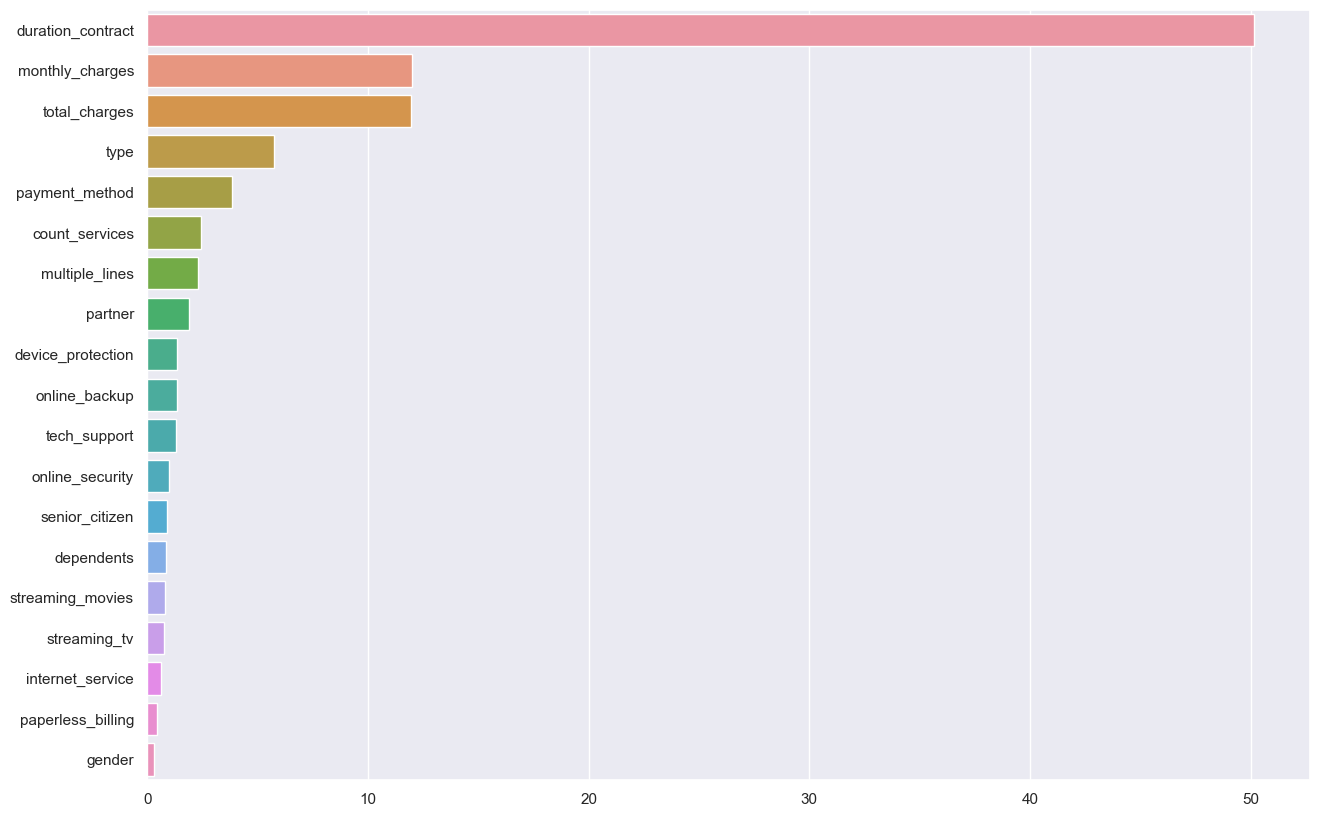

In [107]:
# строим график важности признаков
feature_names = X_train.columns.tolist()
show_coef(feature_names, feature_importances_model_cat_boos)

Самый важный для работы модели признак - `duration_contract` (общая продолжительность действия договора в днях). Этот признак лидирует с существенным отрывом. был сконструирован из двух имеющихся в датасете дат - начала и окончания действия договора.  
В TOP-5 важных признаков также вошли: 
* `type` (тип оплаты: раз в год-два или ежемесячно)
* `monthly_charges` (расходы за месяц)
* `total_charges` (общие расходы абонента)
* `count_services` (количество используемых сервисов)

Практически нулевые коэффициенты получили следующие признаки:
* `gender` (пол абонеента)
* `device_protection` (антивирус)
* `streaming_movies` (каталог фильмов)
* `paperless_billing` (электронный расчётный лист)

## Отчет по исследованию

# Задача
  
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов путем предложения промокодов и специальных условий тем клиентам, кто планирует отказаться от услуг оператора связи.

В нашем распоряжении есть собранные командой оператора связи персональные данные о некоторых клиентах, информация об их договорах, тарифах и услугах. В данном исследовании мы изучаем какие есть зависимости в данных и анализируем какие абоненты больше склонны к расторжению договора обслуживания.

Наша цель - построить модель машинного обучения, прогнозирующая отток клиентов.  
Основываясь на этом предсказании оператор связи планирует выстроить систему индивидуального подхода к склонным к оттоку абонентам.  

# Предобработка данных и EDA  
**Данные**  
Для целей настоящего исследования оператором связи «ТелеДом» предоставлены 4 датасета с информацией о договоре, персональными данными клиента, информация об интернет-услугах и услухах телефонии в отношении 7043 его абонентов, заключивших договор в период с 1 октября 2013 года по 1 февраля 2020 года.  
Данные достаточно хорошего качества. Устранено незначительное количество пропущенных данных по общим расходам клиента - все пропуски наблюдались у клиентов, заключивших договор с оператором связи в последний доступный в датасете день. При этом по этим клиентам имелась информация по расходам за первый месяц. Этими данными и были заполнены пропуски.  
Проведена работа по приведению типов данных к нужным.

**Объединение данных**  
Все четыре датасета по завершении предобработки данных были объеденены в один общий датасет. Объединение датасетов прошло корректно - количестов уникальных клиентов не изменилось. Результаты объедиения данных показали, что 1526 абонентов не пользуются интернетом, а 682 телефонной связью. Образовавшиеся в процессе объединения датасетов пропуски у таких абонентов были заполнены значениями *No_internet* и *No_phone* соответственно.

**Анализ популярности услуг**  
В объединенном датасете есть информация о семи услугах, оказываемых оператором связи:
| признак (услуга)    | краткое описание   |
|----------|:----------|
| online_security    | блокировка опасных сайтов   |
| online_backup      | облачное хранилище файлов для резервного копирования данных   |
| device_protection    | антивирус   |
| tech_support    | выделенная линия технической поддержки   |
| streaming_tv    | стриминговое телевидение   |
| streaming_movies    | каталог фильмов   |
| multiple_lines    | подключение телефона к нескольким линиям одновременно   |

Чтобы понять каким сервисам отдают предпочтения разные группы абонентов и есть ли между ними большие отличия, был проведен сравнительный анализ количества используемых сервисов в разрезе статуса абонента (пол, семейный статус, наличие детей и пенсионный возраст).
* Мужчины и женщины пользуются примерно одинаковым набором услуг. Небольшое отличие наблюдается в частоте использования облачного хранилища и антивируса - мужчины чаще используют антивирус, а женщины чаще облачное хранение.
* Пенсионеры заметно реже подключают услугу блокировки опасных сайтов и выделенную линию поддержки.
* Популярность услуг среди женатых абонентов не сильно отличается от среднего распределения услуг мужчин и женщин.
* В группе абонентов с детьми наблюдаются наибольшее отличие от популярности услуг в остальных группах - здесь нет ярковыраженных услуг, пользующихся популярностью. Количество подключенных услуг, за исключением услуги подключения телефона к нескольким линиям одновременно, распределено более равномерно. По сравнению с другими рассмотреными группами, абоненты с детьми заметно чаще пользуются услугами блокировки опасных сайтов, выделенной линии технической поддержки, облачного хранения файлов, антивируса и каталога фильмов.

**Формирование целевого признака**  
Целевой признак `churn` был сформирован из информации о дате окончания действия договора на обслуживание - у клиентов с завершенным договором была указана дата окончания действия договора, а у действующих абонентов - значение *No*.
В рассматриваемых данных отток абонентов оператора связи составляет 16%. 

**Отток клиентов**  
Исследование показало, что оттоку больше подвержены «платящие» клиенты, которые используют большое количество сервисов оператора связи и на которых приходится большие показатели общих расходов. Клиенты, которые используют большинство сервисов, уходят в первые 2-4 года.  
После 4 лет наблюдается «переломный момент» - когда существенно увеличивается лояльность абонентов и практически прекращается их отток. Однако количество таких клиентов не велико.  
Основная часть клиентов - это неплатящие, либо мало платящие абоненты - те, кто является абонентом до 1 года или не имеют подлюченных услуг.

# Конструирование новых признаков и подготовка данных для обучения моделей
Было сконструировано два новых признака:
* **`duration_contract` - общая продолжительность действия договора (в днях).**  
Этот признак сконструирован исходя из разности двух дат - окончания и начала действия договора. При обучении моделей также тестировался этот признак, выраженный в месяцах. Анализ полученных метрик и оценка важности признаков для моделей в конечном итоге повлияли на выбор продолжительности действия договора в днях.  
По результатам наблюдения за работой лучшей модели, отобранной из числа обученных в данной работе, это признак стал самым важным для предсказания оттока клиентов.

* **`count_services` - количество используемых сервисов.**  
В объединенном датасете есть информация о семи сервисах, используемых абонентами, но основе которой и был сконструирован признак.  
В этом признаке наблюдается вполне предсказуемая закономерность - чем больше подключенных услуг, тем меньше таких клиентов.  
  * 24% абонентов не подключены ни к одной услуге 
  * 16% абонентов пользуются одной услугой
  * по 14% абонентов пользуются двумя, тремя и четыремя услугми
  * 10% абонентов подключены к пяти услугам; 6% - к шести и 3% к семи услугам.
  * В количественном выражении число действующих абонентов уменьшается по мере увеличения числа подключенных у них услуг. И наоборот - по мере увеличения числа подключенных услуг у абонента, растет количество уходящих клиентов.
Наибольшая доля оттока в разрезе количества подключенных услуг у абонентов с пятью такими услугами - примерно 50%.

Было удалено три признака. Целевой признак `churn` имел очень высокую корреляцию с датой окончания действия договора, а продолжительность действия договора имела очень высокую корреляцию с датой начала действия договора. Здесь есть риск утечки информации о целевом признаке, поэтому даты начала и окончания действия договора на обслуживание были исключены из обучающей выборки. Также был удален признак уникального идентификатора абонента.  

**Анализ дисбаланса классов**  
Классы несбалансированны. В имеющемся наборе данных доля негативных примеров с ушедшими клиентами слишком мала - всего 16%.  
Дисбаланс классов обусловлен природой самих данных и такая пропорция классов представляется правдоподобной.  
Учитывая это, в данной работе не проводилась работа по борьбе с дисбалансом, а использовались модели машинного обучения на основе деревьев решений, в том числе бустинговые, которые устойчивы к дисбалансу классов:
* *Random Forest* - бейзлайновая модель
* *Cat Boost*
* *LightGBM*
* *XGBoost*

**Обучающая и тестовая выборка**  
Датасет был разделен на обучающую и тестовую выборки методом *train_test_split*, размер тестовой выборки - 25%.  
Размеры обучающей/тестовой выборок: 5282/1761

**Пайплайн трансформации данных**  
Для бейзлайновой модели *Random Forest Classifier* был построен пайплайн подготовки данных с помощью метода *make_column_transformer*.  
Количественные признаки приведены в единый масштаб с помощью *StandardScaler*, а категориальные признаки закодированы методом *OneHotEncoder*.  
Для *Cat Boost* использовался встроенный кодировщик, а для корректной работы моделей *LightGBM* и *XGBoost* с категориальными признаками они были преобразованы к типу данных *category*.

# Обучение моделей машинного обучения
С учетом дисбаланса классов в целевом признаке, в данном исследовании обучены четыре модели классификации на основе деревьев решений (*Random Forest*, *Cat Boost*, *LightGBM* и *XGBoost*).  
Эффективность работы моделей сравнивалась по метрике *ROC-AUC*, на которую также не влияет дисбаланс.

**Модель *Random Forest*** - бейзлайновая модель

Для подбора гиперпараметров использовался *GridSearchCV*.  
Наилучший результат *ROC-AUC* на кросс-валидации: 0.83

**Модель *LightGBM***

Для подбора гиперпараметров использовался RandomizedSearchCV.  
Наилучший результат *ROC-AUC* на кросс-валидации: 0.89.

**Модель *Cat Boost* - лучшая модель**

Для кодирования категориальных признаков использовался встроенный в *CatBoostClassifier* кодировщик.  
Для подбора гиперпараметров также использовался RandomizedSearchCV.  
Наилучший результат *ROC-AUC* на кросс-валидации: 0.91 - лучший из числа обученных моделей.

Этот результат модель показала на следующих подобранных гиперпараметрах:
* число деревьев в случайном лесу (*iterations*) - 300;
* максимальная глубина деревьев (*depth*) - 2;
* скорость обучения (*learning_rate*) - 0,6;
* коэффициент регуляризации L2 (*l2_leaf_reg*) - 6.

# Тестирование лучшей модели

**Метрики качества**  
На тестовых данных модель *Cat Boost* показала следующие результаты:

| roc_auc_score  | accuracy_score | recall         | precision      | F1-мера        |
|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|
| **0.93**       | **0.92**       | **0.56**       | **0.93**       | **0.7**        |

Из 1761 предсказаний на тестовой выборке:
  * модель верно классифицировала 1619 абонентов (92% от общего количества предсказаний):
    * 1457 (82,7%) абонентов, которые не уходят
    * 162 (9,2%) абонента, которые перестают пользоваться услугами оператора связи.  
  * модель ошиблась 142 раза (8% от всех предсказаний):
    * 13 (0,7%) ложно-положительных предсказаний - то есть 13 абонентов неверно были отнесены к действующим клиентам, хотя на самом деле они уходящие
    * 129 (7,3%) ложно-отрицательных предсказаний - то есть 129 лояльных клиентов были ошибочно классифицированы как уходящие

**Важность признаков**  
Самый важный для работы модели признак - `duration_contract` (общая продолжительность действия договора в днях). Этот признак лидирует с существенным отрывом. был сконструирован из двух имеющихся в датасете дат - начала и окончания действия договора.  
В TOP-5 важных признаков также вошли: 
* `type` (тип оплаты: раз в год-два или ежемесячно)
* `monthly_charges` (расходы за месяц)
* `total_charges` (общие расходы абонента)
* `count_services` (количество используемых сервисов)

Практически нулевые коэффициенты получили следующие признаки:
* `gender` (пол абонента)
* `device_protection` (антивирус)
* `streaming_movies` (каталог фильмов)
* `paperless_billing` (электронный расчётный лист)






# Рекомендации 